# Funções adicionais

## Função de Calculo de Cramer's V

In [1]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# Função de Cramér's V
def cramers_v(x, y):
    tabela = pd.crosstab(x, y)
    chi2 = chi2_contingency(tabela)[0]
    n = tabela.sum().sum()
    phi2 = chi2 / n
    r, k = tabela.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

## Converter segundos em minutos e segundos

In [2]:
import time

def convert_seconds_to_MinAndSec(start_time):
    segundos = time.time() - start_time
    minutos = int(segundos // 60)  # Divisão inteira para obter os minutos
    seg = int(segundos % 60)        # Resto da divisão para obter os segundos
    return str(minutos) + 'min, ' + str(seg) + ' seg'

## Função Calculo de Métricas com 'cross_val_predict'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import xgboost as xgb
import time

def calculate_metrics(X_, y_):
    ''' Funcionalidade:
            Avalia o desempenho de 7 algoritmos de classificação usando validação cruzada, calculando métricas padronizadas e 
            retornando os resultados comparativos em um formato estruturado.
        Entradas:
            X: Conjunto de dados (features) para treino/avaliação dos modelos (array ou DataFrame).           
            y: Variável alvo (rótulos) correspondente aos dados (array ou série).            
        Saída:
            Retorna um dicionário (results) contendo:
            model: Nomes dos modelos avaliados (Logistic Regression, Decision Tree, etc.).
            accuracy: Acurácia média (validação cruzada com 3 folds).
            precision: Precisão média.
            recall: Recall médio.
            f1-score: Pontuação F1 média.
            time: Tempo de execução de cada modelo (formatado em minutos/segundos).
    '''
    
    # Lista de modelos a avaliar
    models = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('Decision Tree', DecisionTreeClassifier(random_state=42)),
        ('Random Forest', RandomForestClassifier(random_state=42)),
        ('SVM', SVC(random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
        ('XGBoost', xgb.XGBClassifier(objective='binary:logistic', enable_categorical=True, random_state=42)),
        ('Perceptron', MLPClassifier(hidden_layer_sizes=(8, 8, 8), random_state=42))
    ]

    # Inicializa estrutura para resultados
    results = {
        'model': [],
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1-score': [],
        'time': []
    }

    for model_name, model in models:
        start_time = time.time()
        
        # Validação cruzada e cálculo de métricas
        y_pred = cross_val_predict(model, X_, y_, cv=3, n_jobs=-1)
        accuracy = round(accuracy_score(y_, y_pred), 2)
        precision = round(precision_score(y_, y_pred), 2)
        recall = round(recall_score(y_, y_pred), 2)
        f1 = round(f1_score(y_, y_pred), 2)
        exec_time = convert_seconds_to_MinAndSec(start_time)
        
        # Armazena resultados
        results['model'].append(model_name)
        results['accuracy'].append(accuracy)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1-score'].append(f1)
        results['time'].append(exec_time)
        
    return results

## Função para Visualzação de Métricas em Tabela

In [4]:
from prettytable import PrettyTable, DOUBLE_BORDER

def create_table(metrics):
    '''
    Cria e imprime uma tabela formatada com título, colunas e linhas 
    a partir de um dicionário de métricas, usando PrettyTable.
    '''
    new_metrics = metrics.copy()
    # Extrair o título
    title = new_metrics.pop('title')
    
    table = PrettyTable()
    table.field_names = new_metrics.keys()
    table.add_rows(list(zip(*new_metrics.values())))
    table.title = title
    table.set_style(DOUBLE_BORDER)  # Estilo de borda dupla para destacar

    print(table)

C:\Users\soled\AppData\Local\Temp\ipykernel_20292\2977133888.py:1: DeprecationWarning: the 'DOUBLE_BORDER' constant is deprecated, use the 'TableStyle' enum instead
  from prettytable import PrettyTable, DOUBLE_BORDER


## Função Encoding Ciclico

In [5]:
def cyclic_encoding(df, column, period):
    """
    Aplica encoding cíclico a uma coluna
    
    Parameters:
    df: DataFrame
    column: nome da coluna
    period: período máximo (31 para dias, 12 para meses)
    """
    df_encoded = df.copy()
    
    # Encoding seno e cosseno
    df_encoded[f'{column}_sin'] = np.sin(2 * np.pi * df[column] / period)
    df_encoded[f'{column}_cos'] = np.cos(2 * np.pi * df[column] / period)
    
    return df_encoded

## Calcular Métricas de modelo -> GridSearch

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

def calculate_metrics_byGridSearch(model, X_test_, y_test_, model_name):
    ''' Avalia modelo otimizado por GridSearch: exibe melhores parâmetros, 
    métricas de desempenho (accuracy, precision, recall, F1) e matriz de confusão.
    
    Parâmetros:
    model (GridSearchCV): Modelo treinado com GridSearchCV
    model_name (str): Nome do modelo para referência
    '''
    
    # Melhores hiperparâmetros encontrados
    print("Melhores hiperparâmetros:", model.best_params_)
    # Melhor score (F1-score)
    print("\nMelhor F1-Score (valição cruzada):", model.best_score_)
    # Modelo com os melhores hiperparâmetros
    best_model = model.best_estimator_
    # Avaliar no conjunto de teste
    y_pred = best_model.predict(X_test_)
    # Calcular métricas
    accuracy = round(accuracy_score(y_test_, y_pred), 3)
    precision = round(precision_score(y_test_, y_pred), 3)
    recall = round(recall_score(y_test_, y_pred), 3)
    f1 = round(f1_score(y_test_, y_pred), 3) 

    print("Scores de avaliação para subconjunto de teste:")
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1_score:", f1)

    # Calcular e mostrar Matriz Confusão
    conf_matrix = confusion_matrix(y_test_, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.show()

## Calcular Métricas de Treino e Teste

In [7]:
def calculate_test_train_metrics(y_train_pred, y_test_pred, y_train_, y_test_):
    '''
    Calcula e exibe métricas de avaliação para conjuntos de treino e teste.
    Inclui accuracy, precision, recall, F1-score e matriz de confusão.
    
    Parâmetros:
    y_train_pred: Predições do modelo no conjunto de treino
    y_test_pred: Predições do modelo no conjunto de teste
    '''
    
    # Calcular métricas de Treino
    accuracy = round(accuracy_score(y_train_, y_train_pred), 3)
    precision = round(precision_score(y_train_, y_train_pred), 3)
    recall = round(recall_score(y_train_, y_train_pred), 3)
    f1 = round(f1_score(y_train_, y_train_pred), 3) 
    
    print("MÉTRICAS DE TREINO:")
    print("Accuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1_score:", f1)
    
    # Calcular métricas de Treino
    accuracy = round(accuracy_score(y_test_, y_test_pred), 3)
    precision = round(precision_score(y_test_, y_test_pred), 3)
    recall = round(recall_score(y_test_, y_test_pred), 3)
    f1 = round(f1_score(y_test_, y_test_pred), 3) 
    
    print("\nMÉTRICAS DE TESTE:")
    print("Accuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1_score:", f1)

    # Calcular e mostrar Matriz Confusão
    conf_matrix = confusion_matrix(y_test_, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.show()

# Importação e Informações do Dataset UCI Bank Marketing 

In [8]:
from sklearn.datasets import fetch_openml
import warnings

warnings.filterwarnings('ignore')  # Ignora todos os warnings

# Carregar o conjunto de dados
bank_marketing = fetch_openml(name='bank-marketing', version=1, as_frame=True)

# Acessar os dados e o alvo
X = bank_marketing.data
y = bank_marketing.target

In [9]:
print(bank_marketing.DESCR)

**Author**: Paulo Cortez, Sérgio Moro
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
**Please cite**: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.       

**Bank Marketing**  
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Attribute information  
For more information, read [Moro et al., 2011].

Input variables:

- bank client data:

1 - age (numeric) 

2 - job : type of job (categorical

### Resumo:

Os dados referem-se a campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing baseavam-se em chamadas telefónicas. Frequentemente, era necessário mais do que um contacto com o mesmo cliente para verificar se o produto (depósito a prazo bancário) seria ('sim') ou não ('não') subscrito.

O objetivo da classificação é prever se o cliente irá subscrever um depósito a prazo (variável y).

Descrição das características:

1 - idade (numérico)

2 - emprego: tipo de emprego (categórico: "administrativo", "desconhecido", "desempregado", "gerência", "empregada doméstica", "empreendedor", "estudante", "operário", "autônomo", "aposentado", "técnico", "serviços")

3 - civil: estado civil (categórico: "casado", "divorciado", "solteiro"; observação: "divorciado" significa divorciado ou viúvo)

4 - escolaridade (categórico: "desconhecido", "secundário", "primário", "superior")

5 - inadimplência: possui crédito em inadimplência? (binário: "sim" 
(não cumpriu suas obrigações de pagamento de um empréstimo ou crédito conforme acordado), "não")

6 - saldo: saldo médio anual, em euros   (Ganhos anuais)(numérico)

7 - moradia: possui financiamento imobiliário? (binário: "sim", "não")

8 - empréstimo: possui financiamento pessoal? (binário: "sim", "não")

- relacionado ao último contato da campanha atual:

9 - contato: tipo de comunicação do contato (categórico: "desconhecido", "telefone", "celular")

10 - dia: último dia do mês para contato (numérico)

11 - mês: último mês do ano para contato (categórico: "jan", "fev", "mar", ..., "nov", "dez")

12 - duração: duração do último contato, em segundos (numérico)

- outros atributos:

13 - campanha: número de contatos realizados durante esta campanha e para este cliente (numérico, inclui o último contato)

14 - dias: número de dias decorridos desde que o cliente foi contatado pela última vez em uma campanha anterior (numérico, -1 significa que o cliente não foi contatado anteriormente)

15 - anterior: número de contatos realizados antes desta campanha e para este cliente (numérico)

16 - resultado: resultado da campanha de marketing anterior (categórico: "desconhecido", "outro", "falha", "sucesso")

- variável de saída (meta desejada):

17 - s - o cliente contratou um depósito a prazo? (binário: "sim", "não")

## Tamanho do Dataset

In [10]:
X.shape

(45211, 16)

# Análise e Pre-Processamento dos Dados

## Alterar nome das colunas

In [11]:
X = X.rename(columns={"V1": "1-age", 
                  "V2": "2-job", 
                  "V3": "3-marital", 
                  "V4": "4-education", 
                  "V5": "5-default", 
                  "V6": "6-balance", 
                  "V7": "7-housing", 
                  "V8": "8-loan", 
                  "V9": "9-contact", 
                  "V10": "10-day", 
                  "V11": "11-month",
                  "V12": "12-duration",
                  "V13": "13-campaign", 
                  "V14": "14-pdays", 
                  "V15": "15-previous", 
                  "V16": "16-poutcome"})

## Visualizar primeiras 5 linhas so dataset

In [12]:
X.head()

,1-age,2-job,3-marital,4-education,5-default,6-balance,7-housing,8-loan,9-contact,10-day,11-month,12-duration,13-campaign,14-pdays,15-previous,16-poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


## Visualizar nº de dados não nulos e tipo de dados de cada característica

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   1-age        45211 non-null  int64   
 1   2-job        45211 non-null  category
 2   3-marital    45211 non-null  category
 3   4-education  45211 non-null  category
 4   5-default    45211 non-null  category
 5   6-balance    45211 non-null  int64   
 6   7-housing    45211 non-null  category
 7   8-loan       45211 non-null  category
 8   9-contact    45211 non-null  category
 9   10-day       45211 non-null  int64   
 10  11-month     45211 non-null  category
 11  12-duration  45211 non-null  int64   
 12  13-campaign  45211 non-null  int64   
 13  14-pdays     45211 non-null  int64   
 14  15-previous  45211 non-null  int64   
 15  16-poutcome  45211 non-null  category
dtypes: category(9), int64(7)
memory usage: 2.8 MB


In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: Class
Non-Null Count  Dtype   
--------------  -----   
45211 non-null  category
dtypes: category(1)
memory usage: 44.4 KB


O dataset contém 9 características categóricas e 7 numéricas e não tem dados nulos. 

O target contém valores categóricos e também não tem valores nulos.

## Substituir os valores do target -> 0 se não subscreveu e 1 se subscreveu o depósito a prazo

In [15]:
# Exibindo a série original
print("Série Original:")
print(y)
# Renomeia as categorias diretamente
y = y.cat.rename_categories({'1': '0', '2': '1'})
print("\Target Após Substituição:")
print(y)

Série Original:
0        1
1        1
2        1
3        1
4        1
        ..
45206    2
45207    2
45208    2
45209    1
45210    1
Name: Class, Length: 45211, dtype: category
Categories (2, object): ['1', '2']
\Target Após Substituição:
0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Class, Length: 45211, dtype: category
Categories (2, object): ['0', '1']


## Substituir os valores de y de strings para inteiros

Para se conseguir trabalhar com os dados é necessário converter os dados de strings para inteiros.

In [16]:
y = y.astype(int)
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Class, Length: 45211, dtype: int32


In [17]:
job_counts = y.value_counts()
print("Contagem de clientes que subscreveram um depósito a prazo.  (0-não subscreveu   1-subscreveu )")
job_counts

Contagem de clientes que subscreveram um depósito a prazo.  (0-não subscreveu   1-subscreveu )


Class
0    39922
1     5289
Name: count, dtype: int64

11,7% dos clientes subscreveu um depósito a prazo.

88,3% dos clientes não subscreveu um depósito a prazo.

## Visualizar dados estatisticos das colunas numéricas

In [18]:
X.describe()

,1-age,6-balance,10-day,12-duration,13-campaign,14-pdays,15-previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Pontos relavantes a ressaltar:**
- Existem com clientes com valores negativos no 'balance' quer dizer que gastaram mais do que ganharam;
- Mais de 75% dos clientes nunca foi contactado antes desta campanha;
- Mais de 75% não foram contactados anteriormente.
- Distribuição assimétrica: balance, campaign, previous e pdays têm médias distantes da mediana devido provavelmente a outliers.

## Visualizar contagens de valores únicos nas coluna categóricas.

In [19]:
categorical_attributes = ['2-job', '3-marital', '4-education', '5-default', '7-housing', '8-loan', '9-contact', '11-month', '16-poutcome']
numerical_attributes = ["1-age", "6-balance", "12-duration", "13-campaign", "14-pdays", "15-previous"]

In [20]:
import numpy as np

for i in categorical_attributes:
    print("Feature: ", end="")
    print(X[str(i)].value_counts())
    print()

target_names = y.value_counts()
target_names

Feature: 2-job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Feature: 3-marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Feature: 4-education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Feature: 5-default
no     44396
yes      815
Name: count, dtype: int64

Feature: 7-housing
yes    25130
no     20081
Name: count, dtype: int64

Feature: 8-loan
no     37967
yes     7244
Name: count, dtype: int64

Feature: 9-contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Feature: 11-month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar   

Class
0    39922
1     5289
Name: count, dtype: int64

## Correlação entre atributos numéricos e histogramas dos mesmos

Uma forma de verificar a correlação entre atributos é usar a função scatter_matrix() que plota cada atributo numerico em relação a outro atributo numerico. A diagonal principal exibe o histograma para cada atributo.

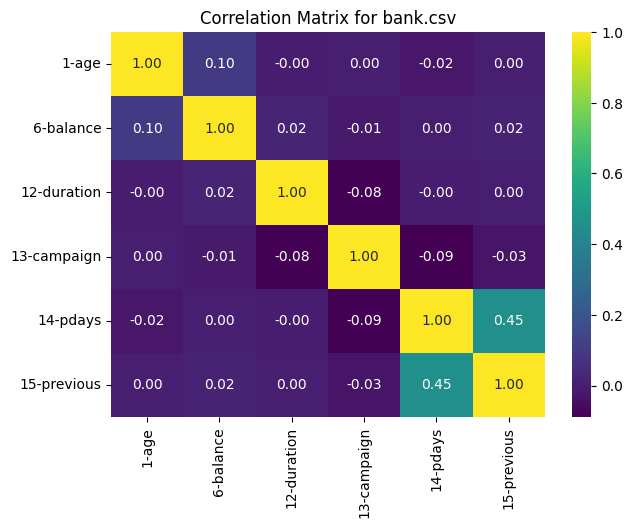

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X[numerical_attributes].corr()

# Criar o gráfico da matriz de correlação
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix for bank.csv')
plt.show()

A maior parte das características não tem qualquer tipo de correlação entre elas excepto as características 'pdays' e 'previous' que têm uma correlação entre si regular.

## Matriz de Dispersão dos Dados

array([[<Axes: xlabel='1-age', ylabel='1-age'>,
        <Axes: xlabel='6-balance', ylabel='1-age'>,
        <Axes: xlabel='12-duration', ylabel='1-age'>,
        <Axes: xlabel='13-campaign', ylabel='1-age'>,
        <Axes: xlabel='14-pdays', ylabel='1-age'>,
        <Axes: xlabel='15-previous', ylabel='1-age'>],
       [<Axes: xlabel='1-age', ylabel='6-balance'>,
        <Axes: xlabel='6-balance', ylabel='6-balance'>,
        <Axes: xlabel='12-duration', ylabel='6-balance'>,
        <Axes: xlabel='13-campaign', ylabel='6-balance'>,
        <Axes: xlabel='14-pdays', ylabel='6-balance'>,
        <Axes: xlabel='15-previous', ylabel='6-balance'>],
       [<Axes: xlabel='1-age', ylabel='12-duration'>,
        <Axes: xlabel='6-balance', ylabel='12-duration'>,
        <Axes: xlabel='12-duration', ylabel='12-duration'>,
        <Axes: xlabel='13-campaign', ylabel='12-duration'>,
        <Axes: xlabel='14-pdays', ylabel='12-duration'>,
        <Axes: xlabel='15-previous', ylabel='12-duration'>]

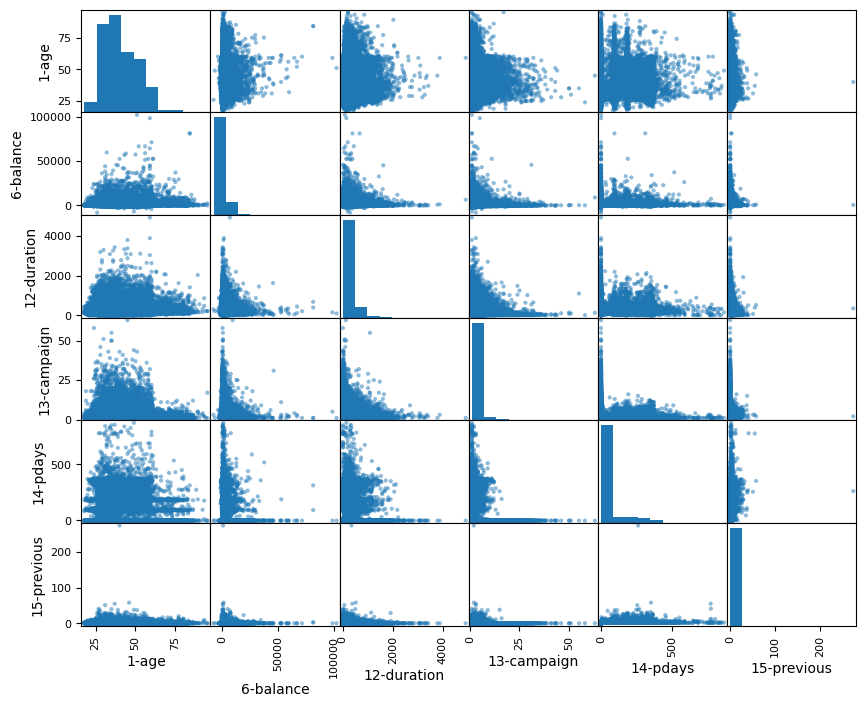

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(X[numerical_attributes], figsize=(10,8))

Após visualizar com algum detalhe conseguimos perceber alguns comportamentos interessantes:  
- Na 1ª linha de gráficos correspondentes à idade percebemos que apartir dos sessenta e poucos anos existe uma alteração no padrão de acontecimentos, provavelmente por ser a idade aproximada da reforma em Portugal. 
- Em relação aos histogramas, dá para ver que em todos os graficos a cauda da distribuição se estende mais para a direita do que para a esquerda (têm assimetria positiva), quando o ideal seria que tivessem uma distribuição simétrica. Mais à frente, vamos testar uma transformação logarítmica para tentar reduzir o impacto desta assimetria.
- É perscetivel a presença de um outlier na característica '15-previous'.

Será visualizado um gráfico relativo à variavel 'pdays' (idade do cliente relativamente ao nº de dias que o cliente foi contactado pela ultima vez) porque acontece algo que suscita a atenção:

<Axes: xlabel='14-pdays', ylabel='1-age'>

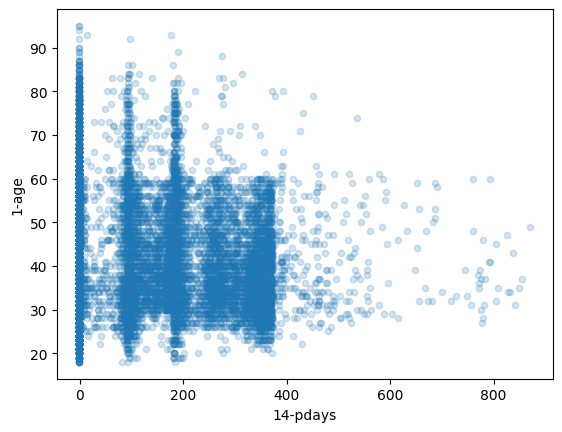

In [23]:
X.plot(kind="scatter", x="14-pdays", y="1-age", alpha=0.2)

Neste de gráfico é precetível que existe uma maior amostragem entre os 20 e 60 anos de idade, ainda assim não existe uma grande relação entre as variáveis. 

Além disso, dá para ver uma linha vertical bem marcada no ponto zero, o que indica que muitos clientes ainda não tinham sido contactados antes. Também se notam outras linhas verticais, menos evidentes, por volta dos valores 100 e perto dos 200. Não consigo perceber ao certo o motivo dessas marcas no gráfico — o ideal seria perguntar diretamente à empresa que forneceu os dados para esclarecer. É importante entender isso, porque essas situações não são ideais: o algoritmo pode acabar por aprender esses padrões estranhos e repetir esses comportamentos nos resultados.

## Remover de Outlier Indesejado

Agora será removido o outlier e de seguida visualizar novamente a matriz de dispersão dos dados

Tamanho da Dataset antes de retirar o outlier: (45211, 16) (45211,)


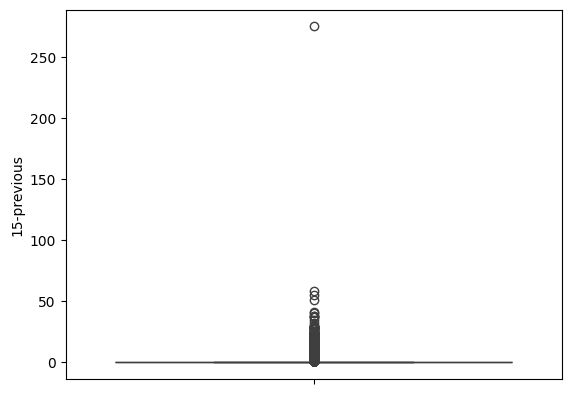


Tamanho da Dataset depois de retirar o outlier: (45210, 16) (45210,)


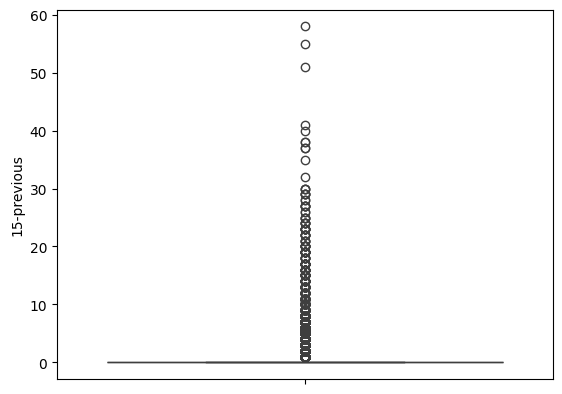

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("Tamanho da Dataset antes de retirar o outlier:", X.shape, y.shape)

sns.boxplot(y=X['15-previous'])
plt.show()

indice_a_remover = X[X['15-previous'] == 275.00].index
# Usar drop para remover as linhas
X = X.drop(indice_a_remover).reset_index(drop=True)
y = y.drop(indice_a_remover).reset_index(drop=True)

print("\nTamanho da Dataset depois de retirar o outlier:", X.shape, y.shape)

sns.boxplot(y=X['15-previous'])
plt.show()

## Visualização e Análise de cada Característica

As características serão visualizadas em gráficos de barras, os outliers serão demonstrados nas características numéricas, com auxilio à funçao boxplot do seabor e a correlação será calculada com o Teste de correlação de Cramér's V pois este mede a força da associação entre uma variável categórica e um target binário.
- 0.0 a 0.1	Muito fraca ou nenhuma
- 0.1 a 0.3	Fraca
- 0.3 a 0.5	Moderada
- ''> 0.5	Forte

### Preparação dos dados para demonstração de gráfico de barras

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

axes_x = []
axes_x_counts = []

# 1-AGE
# Definir os intervalos (bins) e rótulos para as categorias
bins = [17, 25, 35, 45, 55, 65, 75, 85, 90, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-90', '90-100']
# Criar dataframe com categorias de idade e target
category_age = pd.DataFrame({'age': (pd.cut(X['1-age'], bins=bins, labels=labels, right=False)), 'target': y})
# Contar a quantidade de cada target por faixa etária
age_target_counts = category_age.groupby(['age', 'target']).size().unstack()
# Calcular proporções
age_target_percent = age_target_counts.div(age_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(age_target_percent)
axes_x_counts.append(age_target_counts)

#2-JOB
# Criar dataframe com feature job e target
df_job = pd.DataFrame({'job': X['2-job'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
job_target_counts = df_job.groupby(['job', 'target']).size().unstack()
# Calcular proporções
job_target_percent = job_target_counts.div(job_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(job_target_percent)
axes_x_counts.append(job_target_counts)

# 3-MARITAL
# Criar dataframe com feature marital e target
df_marital = pd.DataFrame({'marital': X['3-marital'], 'target': y})
# Contar a quantidade de cada target por estado-civil.
marital_target_counts = df_marital.groupby(['marital', 'target']).size().unstack()
# Calcular proporções
marital_target_percent = marital_target_counts.div(marital_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(marital_target_percent)
axes_x_counts.append(marital_target_counts)

# 4-EDUCATION
# Criar dataframe com feature job e target
df_education = pd.DataFrame({'education': X['4-education'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
education_target_counts = df_education.groupby(['education', 'target']).size().unstack()
# Calcular proporções
education_target_percent = education_target_counts.div(education_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(education_target_percent)
axes_x_counts.append(education_target_counts)

# 5-DEFAULT
# Criar dataframe com feature job e target
df_default = pd.DataFrame({'default': X['5-default'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
default_target_counts = df_default.groupby(['default', 'target']).size().unstack()
# Calcular proporções
default_target_percent = default_target_counts.div(default_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(default_target_percent)
axes_x_counts.append(default_target_counts)

# 6-BALANCE
# Definir os intervalos (bins) e rótulos para as categorias
bins = [-8020, 0, 500, 1500, 5000, np.inf]
labels = ['<0', '0-500', '500-1500', '1500-5000', '>5000']
# Criar dataframe com categorias de  idade e target
category_balance = pd.DataFrame({'balance': (pd.cut(X['6-balance'], bins=bins, labels=labels, right=False)), 'target': y})
# Contar a quantidade de cada target por faixa etária
balance_target_counts = category_balance.groupby(['balance', 'target']).size().unstack()
# Calcular proporções
balance_target_percent = balance_target_counts.div(balance_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(balance_target_percent)
axes_x_counts.append(balance_target_counts)

# 7-HOUSING
# Criar dataframe com feature job e target
df_housing = pd.DataFrame({'housing': X['7-housing'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
housing_target_counts = df_housing.groupby(['housing', 'target']).size().unstack()
# Calcular proporções
housing_target_percent = housing_target_counts.div(housing_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(housing_target_percent)
axes_x_counts.append(housing_target_counts)

# 8-LOAN
# Criar dataframe com feature job e target
df_loan = pd.DataFrame({'loan': X['8-loan'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
loan_target_counts = df_loan.groupby(['loan', 'target']).size().unstack()
# Calcular proporções
loan_target_percent = loan_target_counts.div(loan_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(loan_target_percent)
axes_x_counts.append(loan_target_counts)

# 9-CONTACT
# Criar dataframe com feature tipo de contacto e target
df_contact = pd.DataFrame({'contact': X['9-contact'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
contact_target_counts = df_contact.groupby(['contact', 'target']).size().unstack()
# Calcular proporções
contact_target_percent = contact_target_counts.div(contact_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(contact_target_percent)
axes_x_counts.append(contact_target_counts)

# 10-DAY
# Criar dataframe com feature tipo de contacto e target
df_day = pd.DataFrame({'day': X['10-day'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
day_target_counts = df_day.groupby(['day', 'target']).size().unstack()
# Calcular proporções
day_target_percent = day_target_counts.div(day_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(day_target_percent)
axes_x_counts.append(day_target_counts)

# 11-MONTH
# Criar dataframe com feature tipo de contacto e target
df_month = pd.DataFrame({'month': X['11-month'], 'target': y})
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Converter a coluna 'month' para um tipo categórico com a ordem definida
df_month['month'] = pd.Categorical(df_month['month'], categories=month_order, ordered=True)
# Contar a quantidade de cada target por tipo de trabalho
month_target_counts = df_month.groupby(['month', 'target']).size().unstack()
# Calcular proporções
month_target_percent = month_target_counts.div(month_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(month_target_percent)
axes_x_counts.append(month_target_counts)

# 12-DURATION
# Definir os intervalos (bins) e rótulos para as categorias
bins = [-1, 30, 100, 200, 300, 700, 5000]
labels = ['0-30', '30-100', '100-200', '200-300', '300-700', '700-5000']
# Criar dataframe com categorias de idade e target
category_campaign = pd.DataFrame({'duration': (pd.cut(X['12-duration'], bins=bins, labels=labels, right=False)), 'target': y})
# Contar a quantidade de cada target por faixa etária
campaign_target_counts = category_campaign.groupby(['duration', 'target']).size().unstack()
# Calcular proporções
campaign_target_percent = campaign_target_counts.div(campaign_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(campaign_target_percent)
axes_x_counts.append(campaign_target_counts)

# 13-CAMPAIGN
# Definir os intervalos (bins) e rótulos para as categorias
bins = [0, 2, 5, 10, np.inf]
labels = ['0-2', '2-5', '5-10', '>10']
# Criar dataframe com categorias de idade e target
category_campaign = pd.DataFrame({'campaign': (pd.cut(X['13-campaign'], bins=bins, labels=labels, right=False)), 'target': y})
# Contar a quantidade de cada target por faixa etária
campaign_target_counts = category_campaign.groupby(['campaign', 'target']).size().unstack()
# Calcular proporções
campaign_target_percent = campaign_target_counts.div(campaign_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(campaign_target_percent)
axes_x_counts.append(campaign_target_counts)

# 14-PDAYS
# Definir os intervalos (bins) e rótulos para as categorias
bins = [-1, 0, 100, 200, np.inf]
labels = ['não foi contactado', '0-100', '100-200', '>200']
# Criar dataframe com categorias de idade e target
category_pdays = pd.DataFrame({'pdays': (pd.cut(X['14-pdays'], bins=bins, labels=labels, right=False)), 'target': y})
# Contar a quantidade de cada target por faixa etária
pdays_target_counts = category_pdays.groupby(['pdays', 'target']).size().unstack()
# Calcular proporções
pdays_target_percent = pdays_target_counts.div(pdays_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(pdays_target_percent)
axes_x_counts.append(pdays_target_counts)

# 15-PREVIOUS
# Definir os intervalos (bins) e rótulos para as categorias
bins = [0, 1, 5, 20, np.inf]
labels = ['0', '1-5', '5-20', '>20']
# Criar dataframe com categorias de idade e target
category_previous = pd.DataFrame({'previous': (pd.cut(X['15-previous'], bins=bins, labels=labels, right=False)), 'target': y})
# Contar a quantidade de cada target por faixa etária
previous_target_counts = category_previous.groupby(['previous', 'target']).size().unstack()
# Calcular proporções
previous_target_percent = previous_target_counts.div(previous_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(previous_target_percent)
axes_x_counts.append(previous_target_counts)

# 16-POUTCOME
# Criar dataframe com feature tipo de contacto e target
df_poutcom = pd.DataFrame({'poutcom': X['16-poutcome'], 'target': y})
# Contar a quantidade de cada target por tipo de trabalho
poutcom_target_counts = df_poutcom.groupby(['poutcom', 'target']).size().unstack()
# Calcular proporções
poutcom_target_percent = poutcom_target_counts.div(poutcom_target_counts.sum(axis=1), axis=0) * 100
axes_x.append(poutcom_target_percent)
axes_x_counts.append(poutcom_target_counts)

### Demonstração de gráfico de barras

Estes gráficos tem como objetivo visualizar a correlação que cada caracteristica tem em relação ao target em termos percentuais e de contagem.

#### Graficos de Barras em Termos Percentuais

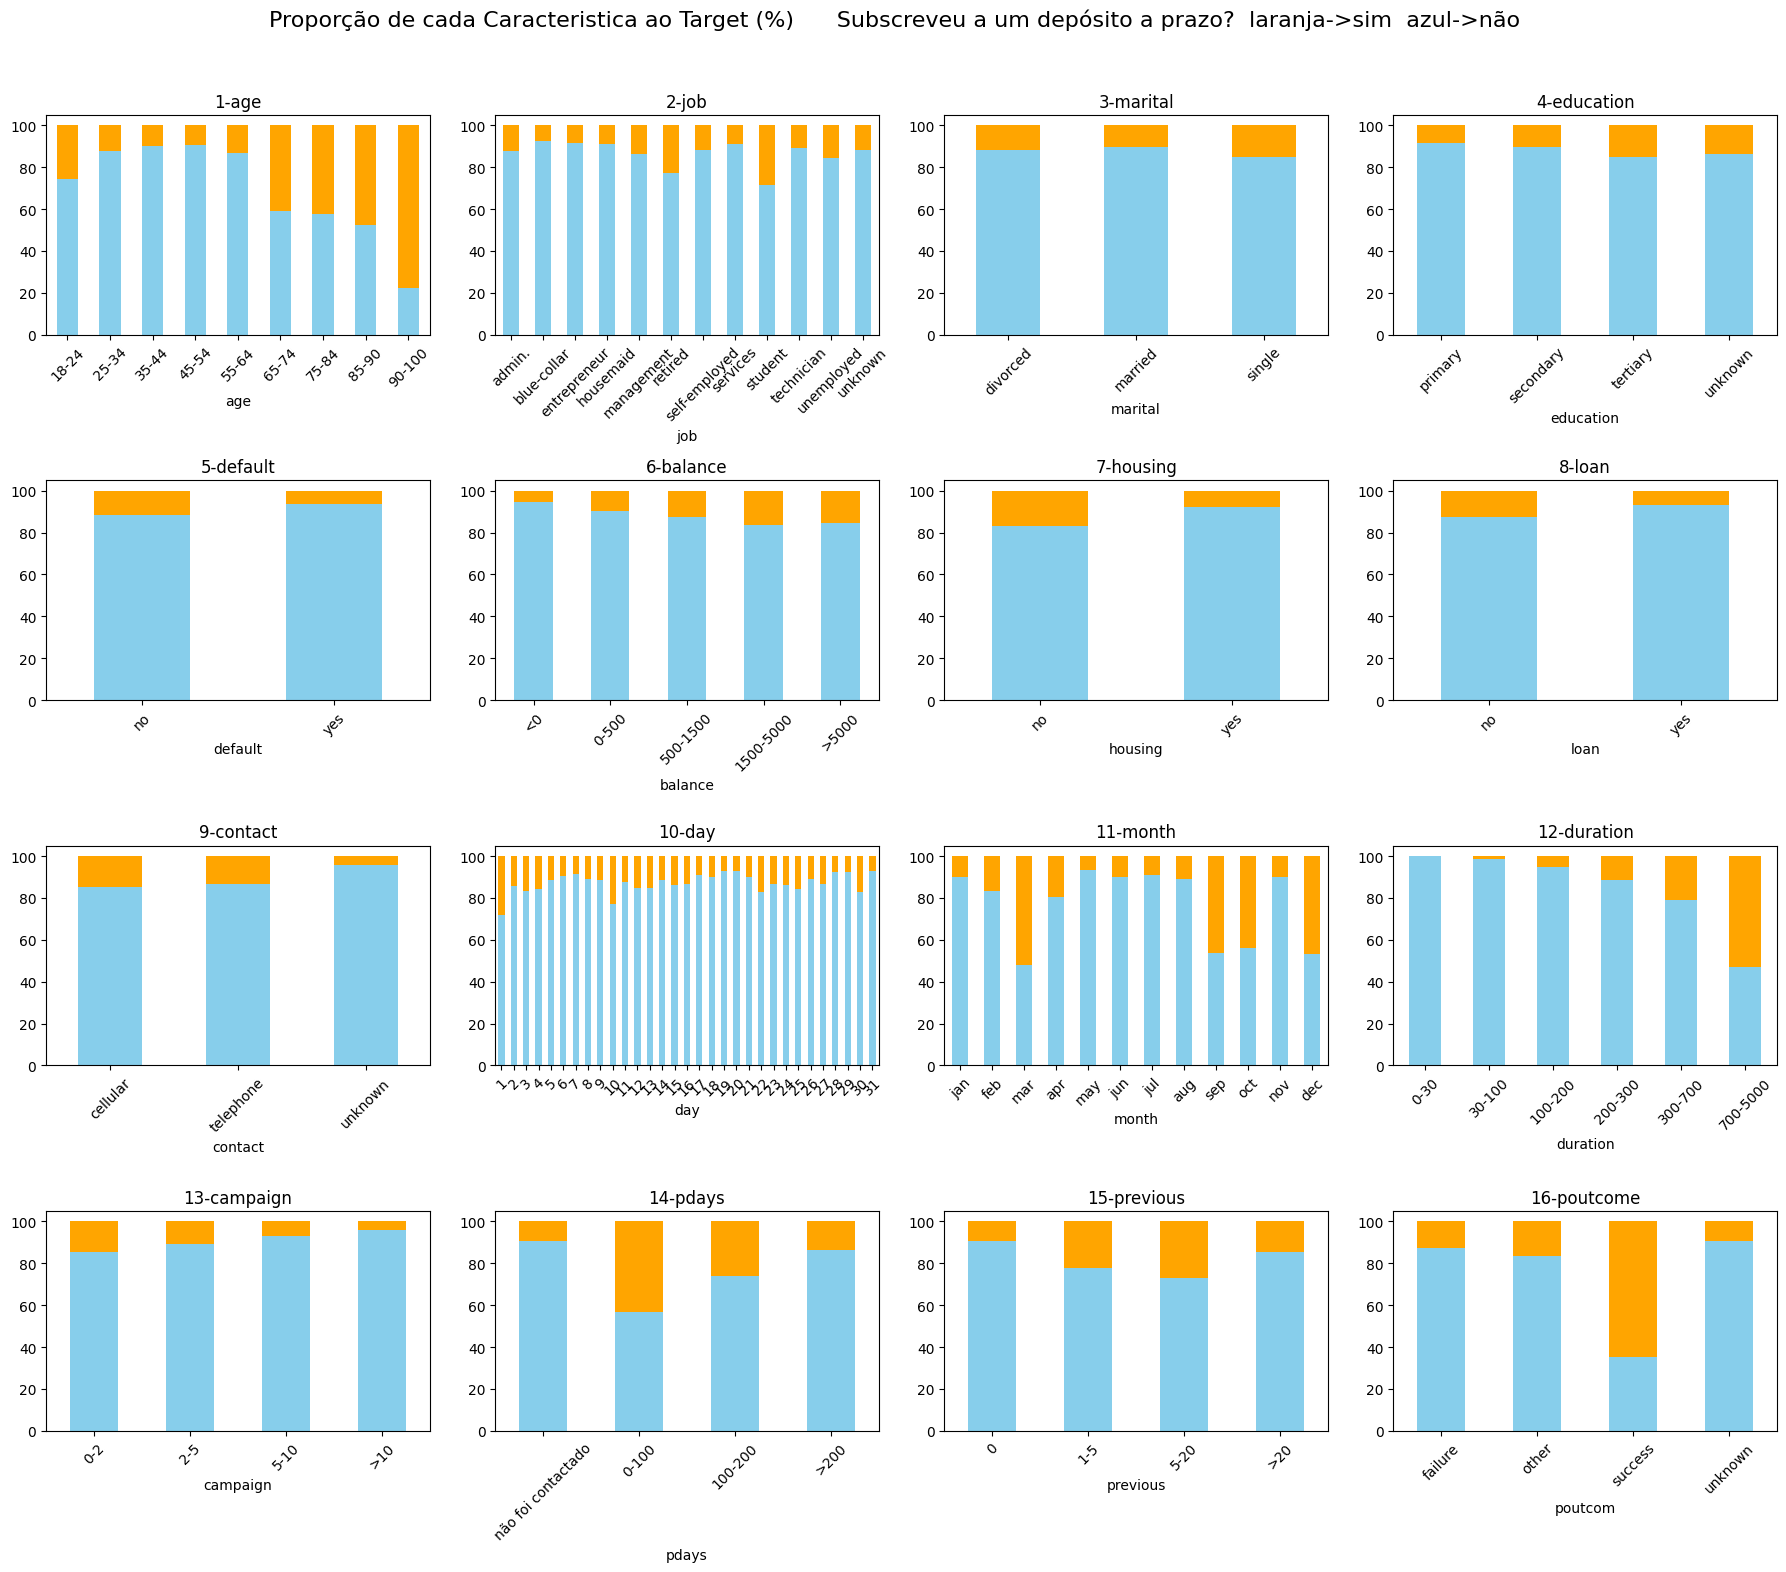

In [26]:
# Concatenar em um único DataFrame para facilitar o loop
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
fig.suptitle('Proporção de cada Caracteristica ao Target (%)      Subscreveu a um depósito a prazo?  laranja->sim  azul->não', fontsize=16)

# Plotar cada gráfico de barras empilhadas
for i, ax in enumerate(axes.flat):
    if i < len(axes_x):
        axes_x[i].plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'], legend=False)
        ax.set_title(X.columns[i])
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.axis('off')  # Esconde subplots

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para não sobrepor o título

#### Graficos de Barras com Contagens Absolutas

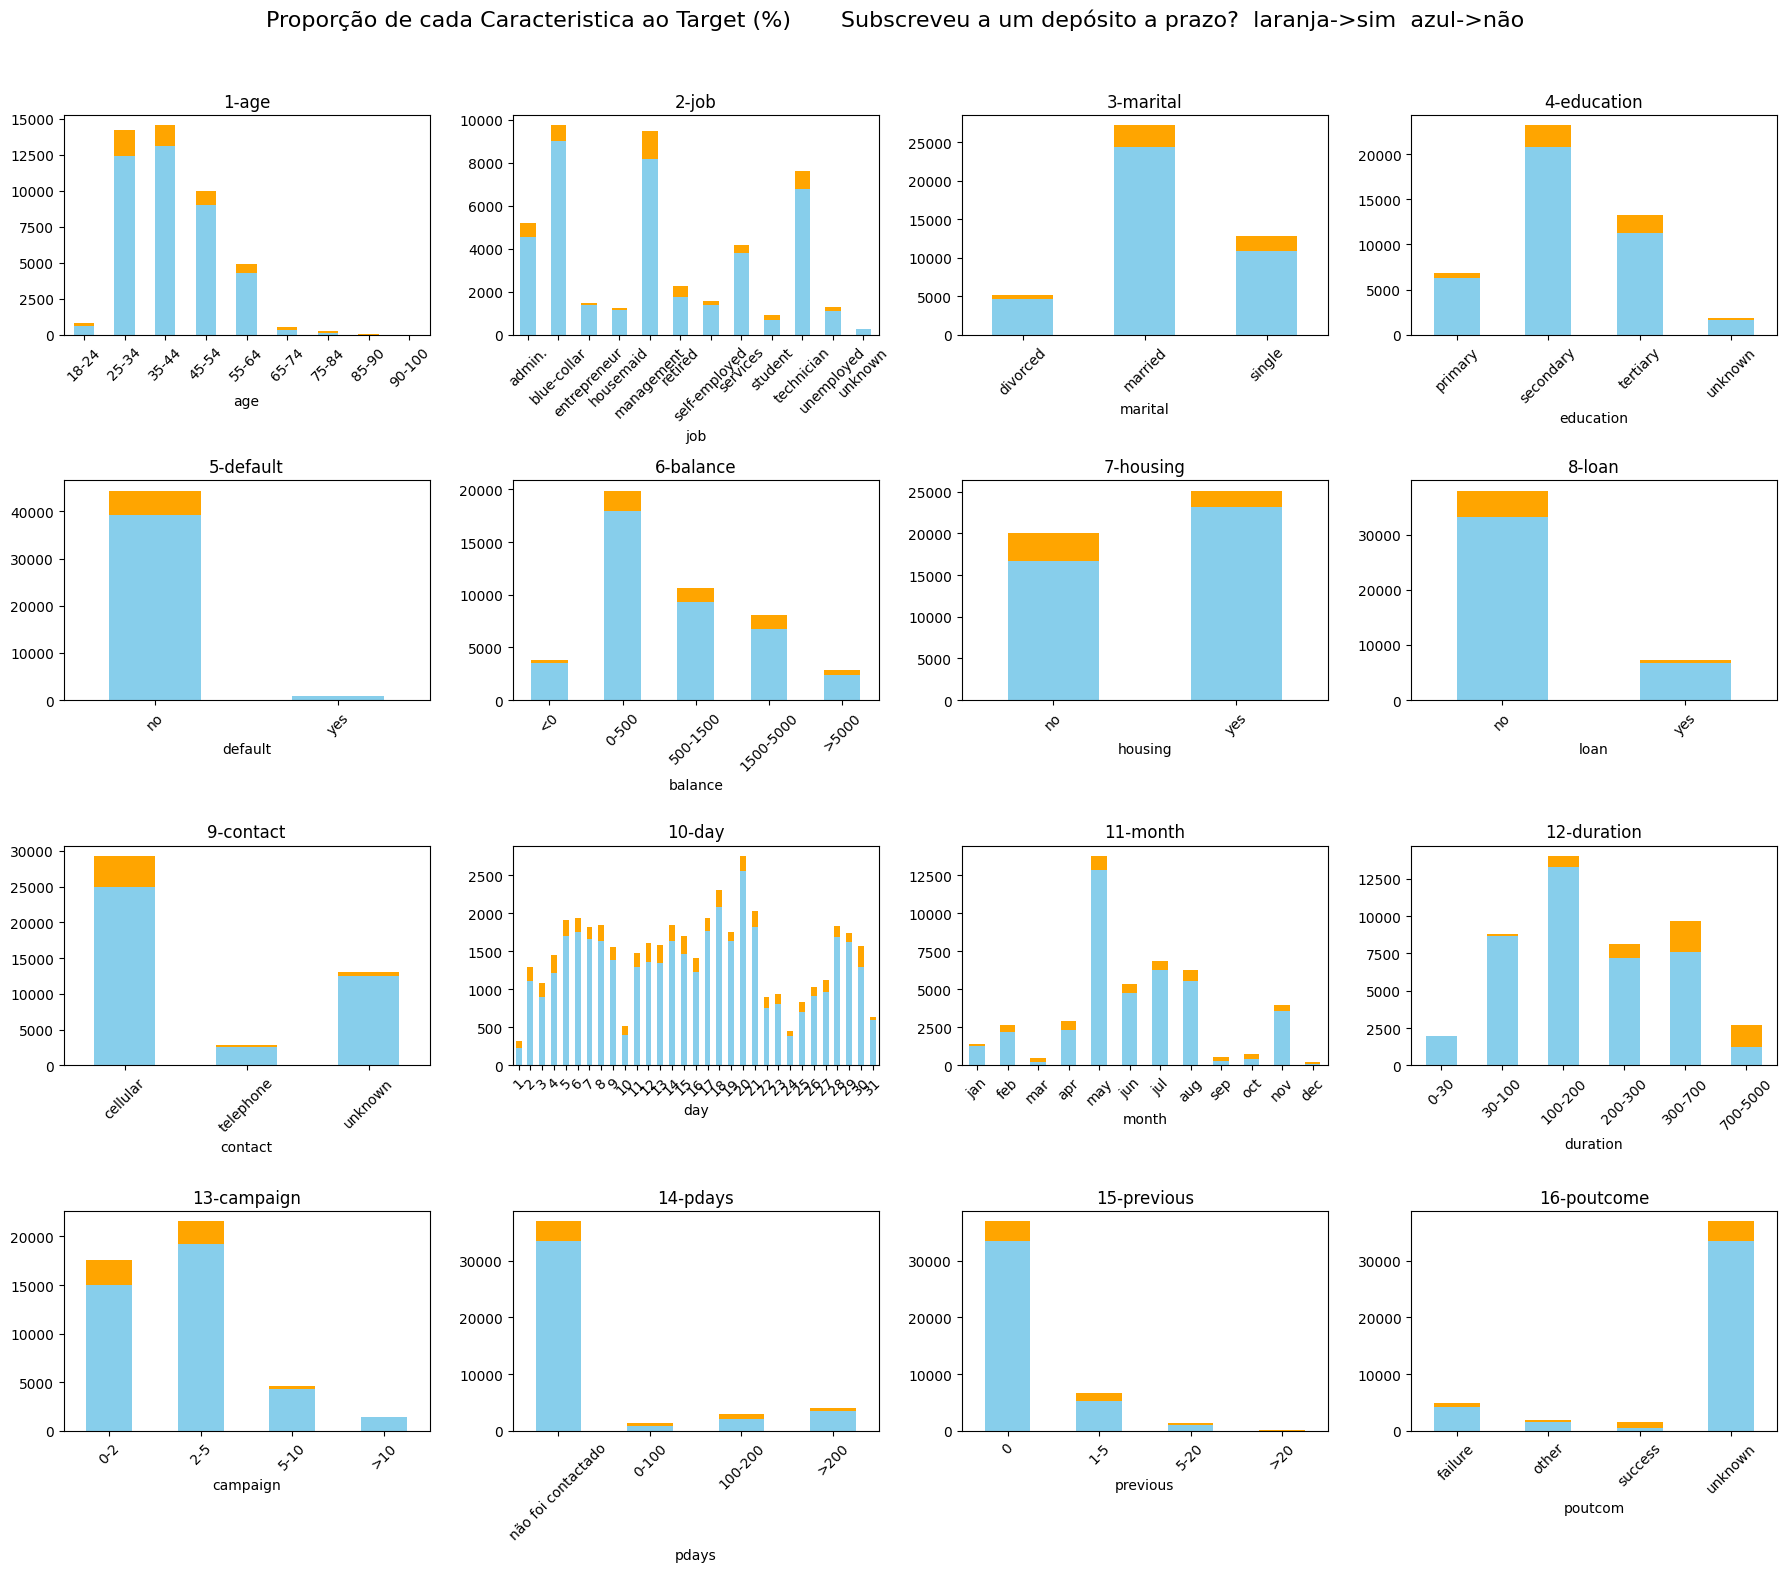

In [27]:
# Concatenar em um único DataFrame para facilitar o loop
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
fig.suptitle('Proporção de cada Caracteristica ao Target (%)       Subscreveu a um depósito a prazo?  laranja->sim  azul->não', fontsize=16)

# Plotar cada gráfico de barras empilhadas
for i, ax in enumerate(axes.flat):
    if i < len(axes_x_counts):
        axes_x_counts[i].plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'], legend=False)
        ax.set_title(X.columns[i])
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.axis('off')  # Esconde subplots

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o layout para não sobrepor o título

### Visualização de outliers das caracteristicas numéricas (Boxplots)

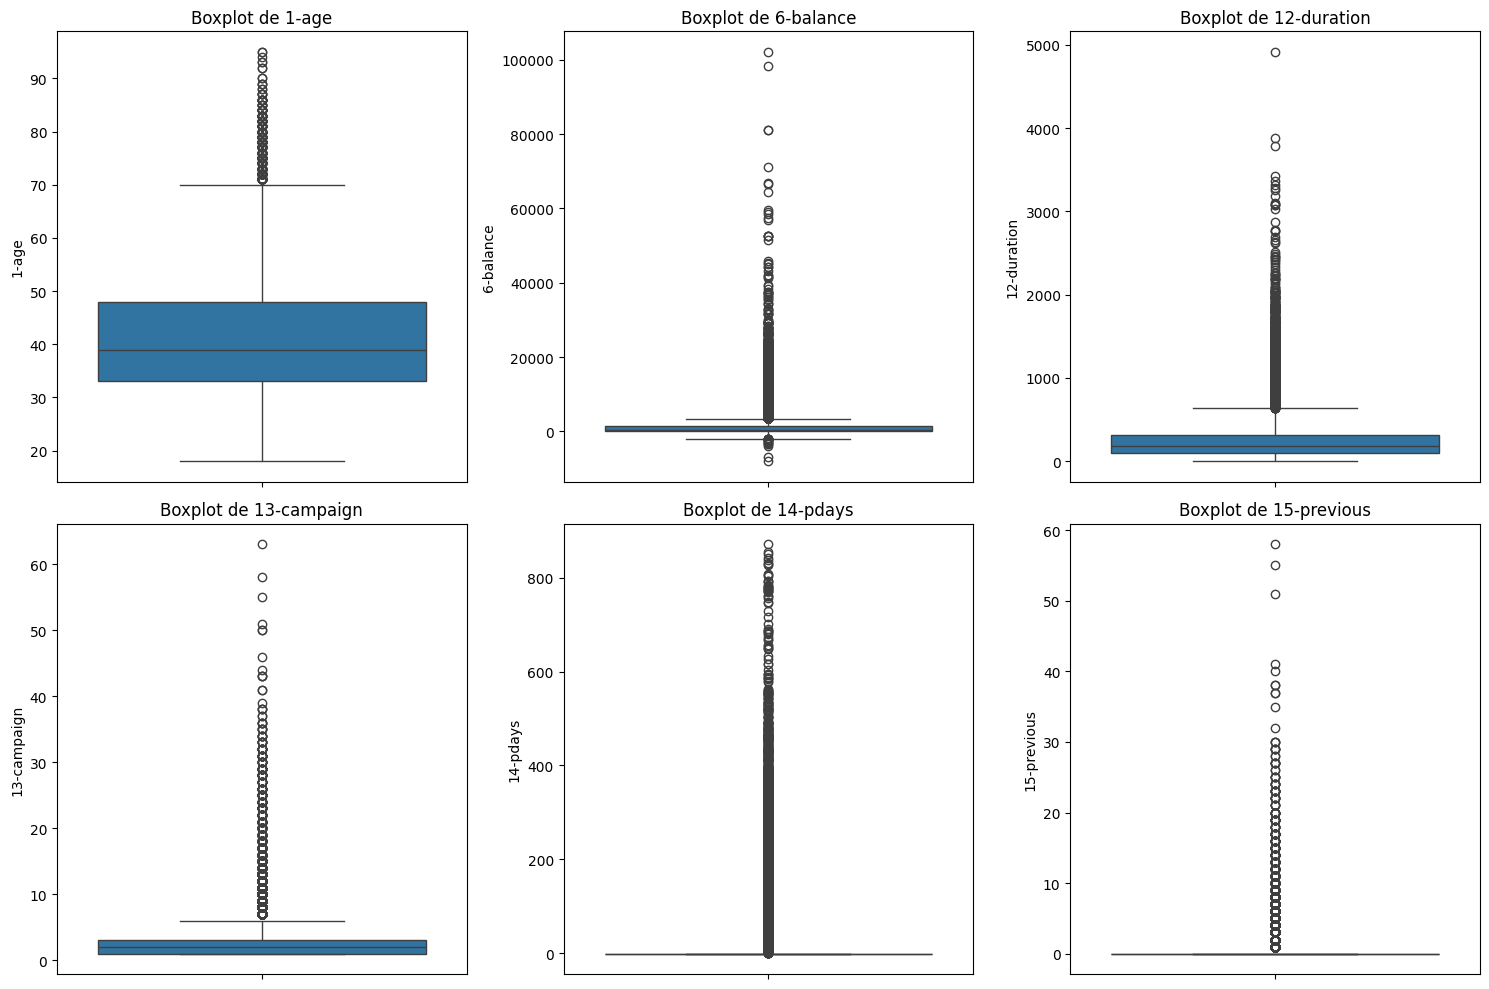

In [28]:
# Supondo que `numerical_attributes` tem 5 colunas e `X` é o DataFrame
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Transforma a matriz 2x3 em um array 1D de 6 eixos

for i, col in enumerate(numerical_attributes):
    sns.boxplot(y=X[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

# Desliga o último eixo (sexto subplot) se não for usado
if len(numerical_attributes) < len(axes):
    axes[len(numerical_attributes)].axis('off')  # Desativa o eixo extra

plt.tight_layout()  # Ajusta o espaçamento entre subplots
plt.show()

Embora os gráficos de caixa revelem a presença de diversos outliers, nenhum deles apresenta motivos suficientes para ser excluído do conjunto de dados.

### Calculo da função de Cramer's V

In [29]:
age_score = cramers_v(X['1-age'], y)
print(f"1-age Cramér's V score = {age_score:.4f}")

job_score = cramers_v(X['2-job'], y)
print(f"2-job Cramér's V score = {job_score:.4f}")

marital_score = cramers_v(X['3-marital'], y)
print(f"3-marital Cramér's V score = {marital_score:.4f}")

education_score = cramers_v(X['4-education'], y)
print(f"4-education Cramér's V score = {education_score:.4f}")

default_score = cramers_v(X['5-default'], y)
print(f"5-default Cramér's V score = {default_score:.4f}")

balance_score = cramers_v(X['6-balance'], y)
print(f"6-balance Cramér's V score = {balance_score:.4f}")

housing_score = cramers_v(X['7-housing'], y)
print(f"7-housing Cramér's V score = {housing_score:.4f}")

loan_score = cramers_v(X['8-loan'], y)
print(f"8-loan Cramér's V score = {loan_score:.4f}")

contact_score = cramers_v(X['9-contact'], y)
print(f"9-contact Cramér's V score = {contact_score:.4f}")

day_score = cramers_v(X['10-day'], y)
print(f"10-day Cramér's V score = {day_score:.4f}")

month_score = cramers_v(X['11-month'], y)
print(f"11-month Cramér's V score = {month_score:.4f}")

duration_score = cramers_v(X['12-duration'], y)
print(f"12-duration Cramér's V score = {duration_score:.4f}")

campaign_score = cramers_v(X['13-campaign'], y)
print(f"13-campaign Cramér's V score = {campaign_score:.4f}")

pdays_score = cramers_v(X['14-pdays'], y)
print(f"14-pdays Cramér's V score = {pdays_score:.4f}")

previous_score = cramers_v(X['15-previous'], y)
print(f"15-previous Cramér's V score = {previous_score:.4f}")

poutcome_score = cramers_v(X['16-poutcome'], y)
print(f"16-poutcome Cramér's V score  = {poutcome_score:.4f}")

1-age Cramér's V score = 0.1902
2-job Cramér's V score = 0.1360
3-marital Cramér's V score = 0.0659
4-education Cramér's V score = 0.0727
5-default Cramér's V score = 0.0222
6-balance Cramér's V score = 0.4695
7-housing Cramér's V score = 0.1391
8-loan Cramér's V score = 0.0681
9-contact Cramér's V score = 0.1514
10-day Cramér's V score = 0.1127
11-month Cramér's V score = 0.2602
12-duration Cramér's V score = 0.4835
13-campaign Cramér's V score = 0.0892
14-pdays Cramér's V score = 0.3165
15-previous Cramér's V score = 0.1745
16-poutcome Cramér's V score  = 0.3117


## Resumo do Capítulo:

Para resumir este capítulo:
- O dataset tem 45211 exemplos e 16 caracetiristicas + target. Como foi eliminada a coluna 'duration' ficou com 15 caracteristicas;
- Não existem valores nulos no dataset;
- Existem 5 características/colunas numéricas e 10 categóricas;
- 88% dos clientes subscreveram e 12% dos clientes não subscreveu o depósito a prazo;
- Na matriz de gráficos de disperção percebeu-se que:
    1. a correlação entre variáveis não é muito forte;
    2. existem alguns comportaqmentos/padrões anormais;
    3. existe um outlier indesejado numa das colunas (já removido);
    4. grande parte das características têm uma distribuição assimétrica positiva.
- Após visualizar os gráficos de barras em termos percentuais concluimos que:
    1. quanto maior a idade do cliente maior será a probabilidade de o cliente subscrever um depósito a prazo;
    2. se o cliente for estudante ou reformado maior será a probabilidade de obter a subscrição;
    3. quanto maior o nível de escolaridade maior será a probabilidade de obter a subscrição;
    4. caso o cliente tenha um empréstimo ibobiliário ou bancário tem uma menor probabilidade de obter uma subscrição;
    5. quanto maior for o nº de contactos realizados ao cliente menor será a probabilidade de obter a subscrição;
    6. caso na campanha anterior seja sido avaliada como "success" maior será probabilidades de subscrição.
- Após visualizar os gráficos de barras com contagens absolutas concluimos que:
    1. Existe um desbalanceamneto significativo nas variáveis '5-default', '8-loan' e '16-potcome'.
    2. Dados 'unknown' representam parte significativa das variáveis '9-contact' e '16-potcome'.
- Relativamente ao Teste de correlação de Cramér's V os atributos com pior pontuação foram '5-default', '3-marital', '4-education', '13-campaign' e '8-loan' com valores abaixo de 0,1. Os atributos com melhor pontuação foram '6-balance', '16-poutcome' e '14-pdays' com valores acima de 0,3.

# Feature Engineering

Este capítulo tem como finalidade explorar diferentes abordagens de pré-processamento de dados, aplicando diversas técnicas para identificar qual método produz os melhores resultados quando combinado com modelos de machine learning. O processo será dividido em várias etapas:

1. **Abordagem Básica**

    - Codificação de variáveis categóricas usando LabelEncoder

    - Normalização dos dados com MinMaxScaler e StandardScaler (aplicados separadamente)

2. **Abordagem Avançada**

    - Codificação mais robusta utilizando OneHotEncoder, CategoryEncoder e mapeamento manual

    - Novamente, aplicação separada de MinMaxScaler e StandardScaler para normalização

3. **Discretização (binning)**
    - Reduzir o impacto de ruído e outliers 

    - Capturar padrões não lineares e facilitar interpretação

4. **Transformação de Variáveis com Logaritmo**

    - Aplicação de logaritmo nas feature numérica, '12-duration', por ter assimetria positiva significativa

5. **Encoding Ciclico**

   - Aplicar o Encoding Ciclico nas variáveis '10-day' e '11-month

6. **Remoção de Features**

    - Eliminação davariável com pior avaliação no teste de correlação de Cramér's V ('5-default')

  
**Objetivos do Capitulo:**

- Identificar quais modelos de machine learning apresentam melhor desempenho

- Determinar a melhor estratégia de pré-processamento dos dados.

Optou-se pela utilização dos seguintes modelos, cada um escolhido pelos respetivos pontos:
- **Logistic Regression**:
    Modelo linear simples, interpretável e eficiente. Serve como baseline para avaliar se modelos mais complexos realmente trazem ganhos significativos.

- **Decision Tree**:
    Fácil de interpretar e compreender. Captura relações não lineares entre as variáveis e fornece explicações intuitivas via regras de decisão.

- **Random Forest**:
    Um ensemble de várias árvores. Reduz overfitting em comparação com uma única Decision Tree, aumentando a robustez e estabilidade.

- **Support Vector Machine (SVM)**:
    Eficaz em problemas de alta dimensionalidade e capaz de encontrar fronteiras de decisão complexas. Bom para casos em que as classes não são linearmente separáveis.

- **Gradient Boosting**:
    Técnica baseada em boosting que constrói modelos sequenciais para corrigir erros anteriores. Muito eficaz em problemas de classificação tabular.

- **XGBoost**:
    Variante otimizada do Gradient Boosting, conhecida pelo alto desempenho em competições e datasets estruturados.

- **Perceptron**:
    Representa uma abordagem inspirada em redes neuronais. Apesar de simples, permite comparar o desempenho de um modelo linear neural face a outros algoritmos clássicos.


## Reduzir e Dividir Dataset em Treino e Teste

O conjunto de dados será dividido 60% para treino e 40% para teste. Neste capitulo, focaremos exclusivamente nos dados de treinamento devido a dois fatores fundamentais:

1. Eficiência Computacional: O volume original de dados (45.210 registros × 15 atributos) demandaria um tempo de processamento excessivo para as operações de transformação e modelagem planejadas enquanto que com 60% ficaremos com 27.126 registos.

2. Validação Robusta: A utilização de técnicas de validação cruzada nos dados de treino garante uma avaliação confiável dos modelos, prevenindo tanto problemas de subajuste (underfitting) quanto sobreajuste (overfitting).

Esta abordagem estratégica nos permite otimizar o tempo computacional enquanto mantemos o rigor metodológico na avaliação do desempenho dos modelos. A validação cruzada, em particular, assegura que nossos resultados não sejam influenciados por particionamentos aleatórios específicos dos dados.

Visto que temos um dataset de classificação binária com um desbalanceamento significativo (muito mais instâncias de uma classe do que da outra), é importante garantir que a divisão entre treino e teste mantenha a proporção original das classes em ambos os conjuntos. Isso é chamado de amostragem estratificada (stratified sampling). Portanto, será utlizado o parametro stratify pois garante que a proporção das classes seja preservada tanto no treino quanto no teste.

In [30]:
from sklearn.model_selection import train_test_split

print(X.shape)
X_train, _, y_train, _= train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True, stratify=y) 
print(X_train.shape)

(45210, 16)
(27126, 16)


## Verificar Presença de Arquivo de Dados Trabalhados

In [31]:
import os
import ipynbname

# Obter o nome do notebook atual (sem extensão)
notebook_path = ipynbname.path()
notebook_name = os.path.splitext(os.path.basename(notebook_path))[0]
notebook_name

'Bank_Marketing-Project'

In [32]:
# work_data = True -> caso ainda não tenha sido exportado os dados trabalhados 
# work_data = False -> caso já tenha sido exportado os dados trabalhados 

data_processed_path = 'DataProcessed/' + notebook_name + '.csv'
print("Path:", data_processed_path)
if not os.path.exists(data_processed_path):
    print("O ficheiro de Dados Trabalhados não existe!!")
    print("Dados precisam ser trabalhados.")
    work_data = True
else:
    print("O ficheiro de Dados Trabalhados já existe!!")
    print("Dados não precisam ser trabalhados.")
    work_data = False

Path: DataProcessed/Bank_Marketing-Project.csv
O ficheiro de Dados Trabalhados já existe!!
Dados não precisam ser trabalhados.


A função **'calculate_metrics'** foi criada com o objetivo de avaliar de forma rápida e padronizada o desempenho de vários modelos de classificação. Ela recebe os dados (X) e rótulos (y), aplica validação cruzada em 7 modelos diferentes e retorna um dicionário com as principais métricas (acurácia, precisão, recall e F1-score) além do tempo de execução de cada um.

A função **'create_table'** tem como objetivo criar e exibir uma tabela formatada utilizando a biblioteca PrettyTable, que contém as métricas de desempenho calculas em 'calculate_metrics'.

## Abordagem Básica

### Execução das Representações: **X_basic_minmax** e **X_basic_standard** 

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

if work_data:   # Caso os dados já tenham sido trabalhados e exportados não o fazer de novo
    # Identifica colunas categóricas
    categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns
    #Fazer uma copia de X_train
    X_basic_encoded = X_train.copy()
    
    # Codificação de Atributos Categóricos
    for column in categorical_columns:
        le = LabelEncoder()
        X_basic_encoded[column] = le.fit_transform(X_train[column])
    
    # Normalização dos Dados
    minmax_scaler = MinMaxScaler()
    standard_scaler = StandardScaler()
    
    X_basic_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_basic_encoded), columns=X_basic_encoded.columns)
    X_basic_standard = pd.DataFrame(standard_scaler.fit_transform(X_basic_encoded), columns=X_basic_encoded.columns)
    X_basic_standard.head()

In [34]:
if work_data:
    metrics_list = []

    metrics = calculate_metrics(X_basic_minmax, y_train)
    metrics['title'] = 'Dados Tratados de forma Simples com MinMaxScaler'
    metrics_list.append(metrics)
    create_table(metrics)
    
    metrics = calculate_metrics(X_basic_standard, y_train)
    metrics['title'] = 'Dados Tratados de forma Simples com StandardScaler'
    metrics_list.append(metrics)
    create_table(metrics)

Como os resultados obtidos com o StandardScaler superaram os do MinMaxScaler nos dados processados de forma básica, daqui em diante utilizaremos apenas o StandardScaler.

## Abordagem Avançada

Nesta abordagem os dados serão codificadas de maneira mais rigorosa: 
- Os atributos '3-marital' e '9-contact' serão codificados com 'OneHotEncoding' uma vez que suas variáveis são categóricas e não têm uma ordem intrínseca.
- O atributo '2-job' será codificado utilizando 'category_encoders' ao invés de 'OneHotEncoding' por ser também uma variável categórica e sem uma ordem intrínseca mas tem um elevado número de categorias diferentes. A utilização da técnica 'OneHotEncoding' resultaria em um grande aumento no número de colunas na transformação deste atributo.
- Para codificar os atributos '4-education', '5-default', '7-housing', '8-loan', '11-month' e '16-poutcome' será utilizada a função 'map' de maneira a controlar a substituição das variáveis por respetivos valores numéricos.

### Execução da Representação: X_advanced_standard

In [35]:
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

if work_data:   # Caso os dados já tenham sido trabalhados e exportados não o fazer de novo
    # Instanciando o OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)
    # Ajustando e transformando as colunas desejadas
    encoded_columns = encoder.fit_transform(X_train[['3-marital', '9-contact']])
    # Criando um DataFrame com as colunas codificadas
    X_advanced_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['3-marital', '9-contact']))
    
    # Adicionar a caracteristica '2-job' ao dataset encoded_df
    X_advanced_encoded['2-job'] = X_train['2-job']
    # Criar o objeto de BinaryEncoder
    encoder = ce.BinaryEncoder(cols=['2-job'])
    # Ajustar e transformar os dados
    X_advanced_encoded = encoder.fit_transform(X_advanced_encoded)
    
    # Aplicando o mapeamento
    education_map = {
        'unknown': 1,
        'primary': 2,
        'secondary': 3,
        'tertiary': 4
    }
    poutcome_map = {
        'unknown': 1,
        'failure': 2,
        'other': 3,
        'success': 4
    }
    binary_map = {
        'no': 0,
        'yes': 1
    }
    month_map = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    X_advanced_encoded['4-education'] = X_train['4-education'].map(education_map).reset_index(drop=True)
    X_advanced_encoded['5-default'] = X_train['5-default'].map(binary_map).reset_index(drop=True).reset_index(drop=True)
    X_advanced_encoded['7-housing'] = X_train['7-housing'].map(binary_map).reset_index(drop=True)
    X_advanced_encoded['8-loan'] = X_train['8-loan'].map(binary_map).reset_index(drop=True)
    X_advanced_encoded['11-month'] = X_train['11-month'].map(month_map).reset_index(drop=True)
    X_advanced_encoded['16-poutcome'] = X_train['16-poutcome'].map(poutcome_map).reset_index(drop=True)
    
    # Acrescentar restantes colunas
    X_advanced_encoded['1-age'] = X_train['1-age'].reset_index(drop=True)
    X_advanced_encoded['6-balance'] = X_train['6-balance'].reset_index(drop=True)
    X_advanced_encoded['10-day'] = X_train['10-day'].reset_index(drop=True)
    X_advanced_encoded['12-duration'] = X_train['12-duration'].reset_index(drop=True)
    X_advanced_encoded['13-campaign'] = X_train['13-campaign'].reset_index(drop=True)
    X_advanced_encoded['14-pdays'] = X_train['14-pdays'].reset_index(drop=True)
    X_advanced_encoded['15-previous'] = X_train['15-previous'].reset_index(drop=True)
    X_advanced_encoded.head()
    
    # Normalizar os Dados
    standard_scaler = StandardScaler()
    
    X_advanced_standard = pd.DataFrame(standard_scaler.fit_transform(X_advanced_encoded), columns=X_advanced_encoded.columns)
    
    print(X_advanced_standard.head())

In [36]:
if work_data:
    # Calcular e visualizar métricas
    metrics = calculate_metrics(X_advanced_standard, y_train)
    metrics['title'] = 'Dados Tratados de forma Rigorosa com StandardScaler'
    metrics_list.append(metrics)
    create_table(metrics)

Como os resultados obtidos tratados de forma rigorosa superaram os resultados obtidos relativamente aos dados processados de forma básica, na seuguinte transformação iremos utlizar os dados processados de forma rigorosa. 

## Discretização (binning)

### Execução da Representação: X_advanced_binning_standard

In [37]:
if work_data:   # Caso os dados já tenham sido trabalhados e exportados não o fazer de novo

    # Criar novo Dataframe para fazer o binning copiado de X_advanced_encoded
    X_advanced_binning = X_advanced_encoded.copy()

    # 1-AGE
    # Definir os intervalos (bins) e rótulos para as categorias
    bins = [17, 30, 35, 40, 50, 100]
    labels = [0, 1, 2, 3, 4]
    # Alterar feature com categorias de idade e target
    X_advanced_binning['1-age'] = pd.cut(X_advanced_binning['1-age'], bins=bins, labels=labels, right=False)


    # 12-DURATION
    # Definir os intervalos (bins) e rótulos para as categorias
    bins = [-1, 50, 120, 200, 300, 600, 5000]
    labels = [0, 1, 2, 3, 4, 5]
    # Criar dataframe com categorias de idade e target
    X_advanced_binning['12-duration'] = pd.cut(X_advanced_binning['12-duration'], bins=bins, labels=labels, right=False)


    # 13-CAMPAIGN
    # Definir os intervalos (bins) e rótulos para as categorias
    bins = [0, 2, 5, 10, np.inf]
    labels = [0, 1, 2, 3]
    # Criar dataframe com categorias de idade e target
    X_advanced_binning['13-campaign'] = pd.cut(X_advanced_binning['13-campaign'], bins=bins, labels=labels, right=False)

    # 14-PDAYS
    # Definir os intervalos (bins) e rótulos para as categorias
    bins = [-1, 0, 100, 200, np.inf]
    labels = [0, 1, 2, 3]
    # Criar dataframe com categorias de idade e target
    X_advanced_binning['14-pdays'] = pd.cut(X_advanced_binning['14-pdays'], bins=bins, labels=labels, right=False)

    # 15-PREVIOUS
    # Definir os intervalos (bins) e rótulos para as categorias
    bins = [0, 1, 2, 5, np.inf]
    labels = [0, 1, 2, 3]
    # Criar dataframe com categorias de idade e target
    X_advanced_binning['15-previous'] = pd.cut(X_advanced_binning['15-previous'], bins=bins, labels=labels, right=False)

    # Normalizar os Dados
    standard_scaler = StandardScaler()

    X_advanced_binning_standard = pd.DataFrame(standard_scaler.fit_transform(X_advanced_binning), columns=X_advanced_binning.columns)

    # Visualizar dados trabalhados de forma avançada
    print(X_advanced_binning_standard.head())

In [38]:
if work_data:
    # Calcular e visualizar métricas
    metrics = calculate_metrics(X_advanced_binning_standard, y_train)
    metrics['title'] = 'Dados Tratados de forma Rigorosa e com Binning e com StandardScaler'
    metrics_list.append(metrics)
    create_table(metrics)

Dado que a aplicação do Binnning não trouxe melhorias relevantes, optaremos por prosseguir apenas com os dados tratados de forma Avançada.

## Transformação de Variáveis com Logaritmo

Abaixo será feita a transformação da variável '12-duration' aplicando o logaritmo, isto tem como objetivos: 
1. Reduzir o Impacto de Outliers. O logaritmo comprime a escala dos valores altos, tornando a distribuição mais equilibrada.
2. Outliers em features assimétricas podem dominar o comportamento do modelo. 
O logaritmo reduz o impacto desses outliers porque transforma diferenças absolutas grandes em diferenças relativas menore.

### Execução da Representação: X_advanced_log_standard

In [39]:
if work_data:   # Caso os dados já tenham sido trabalhados e exportados não o fazer de novoabsX_advanced_encoded['12-duration'].hist(bins=50, figsize=(8, 4))
    X_advanced_encoded['12-duration'].hist(bins=50, figsize=(8, 4))
    plt.title("Gráfico '12-duration' antes de aplicar o Logaritmo")
    plt.show()
    
    X_advanced_encoded_log = pd.DataFrame(X_advanced_encoded, columns=X_advanced_encoded.columns)
    X_advanced_encoded_log['12-duration'] = np.log1p(X_advanced_encoded['12-duration']+1).reset_index(drop=True)
    
    X_advanced_encoded_log['12-duration'].hist(bins=50, figsize=(8, 4))
    plt.title("Gráfico '12-duration' depois de aplicar o Logaritmo")
    plt.show()
    
    # Normalizando os dados
    standard_scaler = StandardScaler()
    
    X_advanced_log_standard = pd.DataFrame(standard_scaler.fit_transform(X_advanced_encoded_log), columns=X_advanced_encoded_log.columns)
    
    print(X_advanced_log_standard.head())

Dado que a aplicação do logaritmo não trouxe melhorias relevantes, optaremos por prosseguir apenas com os dados tratados de forma avançada.

## Encoding Cíclico

O encoding cíclico foi aplicado nas variáveis "dia do mês" e "mês do ano" para resolver o problema de descontinuidade inerente a variáveis temporais de natureza circular. Para o dia do mês, esta transformação garante que a transição entre o dia 31 e o dia 1 seja interpretada como uma continuidade natural e não como uma quebra artificial, preservando assim a relação de proximidade temporal. Da mesma forma, para os meses do ano, a passagem de dezembro para janeiro mantém sua relação cíclica, permitindo que padrões sazonais entre meses opostos, como verão e inverno, sejam corretamente capturados pelo modelo.

Esta abordagem possibilita que os algoritmos de machine learning compreendam a natureza circular do tempo, melhorando significativamente a deteção de padrões sazonais e a precisão das previsões nas transições entre diferentes ciclos temporais.

### Execução da Representação: X_advanced_removed_cyclic_standard

In [40]:
if work_data:   # Caso os dados já tenham sido trabalhados e exportados não o fazer de novo
    # Aplicar Encoding Ciclico na variável '10-day'
    X_advanced_cyclic = cyclic_encoding(X_advanced_encoded, '10-day', 31)
    # Converter variavel categorica para numerica
    X_advanced_cyclic['11-month'] = X_advanced_cyclic['11-month'].astype('int64')
    # Aplicar Encoding Ciclico na variável '11-month'
    X_advanced_removed_cyclic = cyclic_encoding(X_advanced_cyclic, '11-month', 12)
    
    # Colunas a serem removidas
    cols_to_remove = ['10-day', '11-month']
    X_advanced_removed_cyclic = X_advanced_removed_cyclic.drop(columns=cols_to_remove)
    
    # Normalizando os dados
    standard_scaler = StandardScaler()
    X_advanced_cyclic_standard = pd.DataFrame(standard_scaler.fit_transform(X_advanced_removed_cyclic), columns=X_advanced_removed_cyclic.columns)
    
    print(X_advanced_cyclic_standard.head())

In [41]:
if work_data:
    # Calcular e visualizar métricas
    metrics = calculate_metrics(X_advanced_cyclic_standard, y_train)
    metrics['title'] = 'Dados Tratados de forma Rigorosa com Encoding Ciclico'
    metrics_list.append(metrics)
    create_table(metrics)

Dado que a aplicação do Encodin Cíclico trouxe melhorias, optaremos por prosseguir esta tranformação !!

## Remoção de Variáveis

O dataset com melhor avaliação foi o Dataset treinado com uma abordagem avançada. Assim sendo, iremos fazer outro teste: eliminar a coluna que obteve o pior resultado no Teste de correlação de Cramér's V, nomeadamnete a coluna '5-default'.

### Execução da Representação: X_advanced_removed_standard

In [42]:
if work_data:   # Caso os dados já tenham sido trabalhados e exportados não o fazer de novo
    X_advanced_removed = pd.DataFrame(X_advanced_encoded)
    # Colunas a serem removidas
    cols_to_remove = ['5-default']
    X_advanced_removed = X_advanced_removed.drop(columns=cols_to_remove)
    X_advanced_removed.head()
    
    # Normalizando os dados com MinMaxScaler
    standard_scaler = StandardScaler()
    X_advanced_removed_standard = pd.DataFrame(standard_scaler.fit_transform(X_advanced_removed), columns=X_advanced_removed.columns)
    
    print(X_advanced_removed_standard.head())

In [43]:
if work_data:
    # Calcular e visualizar métricas
    metrics = calculate_metrics(X_advanced_removed_standard, y_train)
    metrics['title'] = 'Dados Tratados de forma Rigorosa removendo a feature 5-default'
    metrics_list.append(metrics)
    create_table(metrics)

# Avaliação e Comparação das Novas Representações do Dataset e dos Modelos Utilizados

O dataset original foi submetido a diferentes tratamentos, gerando múltiplas versões pré-processadas. Para avaliar sistematicamente o impacto desses processamentos no desempenho dos modelos, neste capítulo iremos executar os seguintes passos:
1. Compar algoritmos de Machine Learning
    - Testa 6 modelos: Regressão Logística, Árvore de Decisão, Random Forest, SVM, Gradient Boosting e Precepton;
    - Em todas as variações do dataset processado.
2. Gera métricas de desempenho
    - Calcula accuracy, precisão, recall, F1-score e o tempo de execução para cada combinação modelo/dataset
3. Cria relatório automatizado
    - Exporta os resultados para um arquivo Excel com formatação profissional
    - Organiza as informações em tabelas comparativas

Esta abordagem permite uma análise rápida e padronizada do desempenho dos modelos em diferentes cenários de pré-processamento.

## Exportar Resultados para Ficheiro Excel

A classe ExportCalculatedMetrics foi criada com o objetivo de automatizar a comparação e exportação de métricas de desempenho de modelos para um arquivo Excel formatado. Ela recebe uma lista de resultados de avaliação (precisão, recall, F1-score) dos vários tratamentos sofridos do dataset original e gera um folha organizada com tabelas comparativas.

In [44]:
from ExportMetricsToExcel_1 import ExportCalculatedMetrics

path_name = "Metrics_Tables/" + notebook_name

if not os.path.exists(path_name + ".xlsx"):
    export = ExportCalculatedMetrics(metrics_list, path_name)
    export.export_metrics()
    print("O ficheiro de Tabela de Métricas foi exportado!!")
else:
    print("O ficheiro de Tabela de Métricas já existe!!")

O ficheiro de Tabela de Métricas já existe!!


## Relatório dos Resultados Obtidos

Antes de seguirmos para o relatório dos resultados falta responder uma questão: Qual é a métrica prioritária? 
Como já percebemos o dataset refere-se a uma campanha de marketing de um banco português, onde o objetivo é prever se um cliente subscreverá (ou não) um depósito a prazo (variável-alvo y: "yes" ou "no").

Características Principais:
- Desbalanceamento: A classe positiva ("yes") é minoritária (apenas ~11% dos casos no dataset original).
- Custo de Erro:
    1. Falso Negativo (FN): Perder um cliente potencial (oportunidade de lucro).
    2. Falso Positivo (FP): Custo de contactar um cliente que não subscreve (tempo e recursos desperdiçados).

Como temos um desbalanceamento no target (11% 'Sim' e 89% 'Não') a **acurácia** pode ser uma métrica enganosa porque imaginemos que o modelo prevêsse em todos os casos 'Não' acertaria 89% das vezes. Por esse motivo não iremos prioritizar esta métrica mas nunca ignorá-la!!

Dependendo do objetivo do negócio, as métricas prioritárias podem ser:
- **Precision**. Se o foco é minimizar custos operacionais (evitar FP).
    1. Porquê? Porque queremos garantir que, dos clientes classificados como "yes", a maioria realmente subscreva e porque reduz o custo de campanhas ineficazes (contatos desnecessários).
    2. Limitação: Pode deixar passar clientes interessantes (alta taxa de FN).
- **Recall**. Se o foco é capturar o máximo de clientes potenciais (evitar FN).
    1. Porquê? Queremos identificar a maior quantidade possível de clientes que podem subscrever ("yes"), mesmo que isso inclua alguns FPs.
    2. Limitação: Aumenta o custo da campanha (mais contatos sem retorno).
- **F1-score** (balanceamento entre Precision e Recall)
    1. Porquê? Equilibra a identificação de clientes potenciais e o custo de falsos positivos.

**Como não existe a possibilidade de haver contacto com o cliente para perceber qual é o objetivo da campanha vamos optar por prioritizar a métrica F1-score.**

### Visualizar Graficamente as Métricas Calculadas

In [45]:
if work_data:
    # Plotar diretamente do DataFrame
    plt.figure(figsize=(10, 6))
    for i, dataset in enumerate(metrics_list):
        plt.plot(dataset['model'], dataset['f1-score'], label=dataset['title'], linewidth=2)
    
    plt.title('Vendas de Produtos ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Vendas')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

### Calculo do somatório dos valores de F1-Score

In [46]:
if work_data:
    # Calcular o somatorio de valores f1-score
    for dataset in metrics_list:
        total_f1 = 0
        for f1 in dataset['f1-score']:
            total_f1 += f1
        print(dataset['title'])
        print("Somatório dos valores f1-score:", round(total_f1, 2))

1. **Dataset com Melhor F1-Score**

O dataset "Dados Tratados de forma Rigorosa com Encoding Ciclico" obteve o melhor somatório de F1-scores testados. 

2. **Top 5 Modelos por F1-Score no Dataset Selecionado**

    - XGBoost: F1-score: 0.54.
    - Decision Tree: F1-score: 0.47.
    - Gradient Boosting: F1-score: 0.51.
    - Random Forest: F1-score: 0.5.
    - Perceptron: F1-score: 0.5.

## Exportar Dataset para ficheiro Excel

Como a versão pre-processada 'Dados Tratados de forma Rigorosa com SMOTE aplicando StandardScaler' foi a que obteve melhor avaliação relativamente às restantes versões então iremos exportar essa versão para um ficheiro excel.
Mas como iremos aplicar 


In [47]:
import os

data_processed_path = 'DataProcessed/' + notebook_name + '.csv'

if work_data:
    X_advanced_cyclic_standard['target'] = y_train.reset_index(drop=True) # remove os índices originais e usa uma sequência padrão
    X_advanced_cyclic_standard.to_csv(data_processed_path, index=False) # remove a coluna de índices do arquivo CSV
    print("Ficheiro exportado com sucesso!!")
else:
    print("O ficheiro a ser exportado já existe!!")

O ficheiro a ser exportado já existe!!


## Pipeline

In [48]:
def Pipeline(df):
    '''
    Pipeline de pré-processamento: aplica encoding, mapeamento de variáveis,
    transformações cíclicas e normalização aos dados.
    
    Parâmetros:
    df (DataFrame): DataFrame com os dados brutos para processamento
    
    Retorna:
    DataFrame: Dados trabalhados
    '''
    
    # Instanciando o OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)
    # Ajustando e transformando as colunas desejadas
    encoded_columns = encoder.fit_transform(df[['3-marital', '9-contact']])
    # Criando um DataFrame com as colunas codificadas
    X_advanced_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['3-marital', '9-contact']))
    
    # Adicionar a caracteristica '2-job' ao dataset encoded_df
    X_advanced_encoded['2-job'] = df['2-job']
    # Criar o objeto de BinaryEncoder
    encoder = ce.BinaryEncoder(cols=['2-job'])
    # Ajustar e transformar os dados
    X_advanced_encoded = encoder.fit_transform(X_advanced_encoded)
    
    # Aplicando o mapeamento
    education_map = {
        'unknown': 1,
        'primary': 2,
        'secondary': 3,
        'tertiary': 4
    }
    poutcome_map = {
        'unknown': 1,
        'failure': 2,
        'other': 3,
        'success': 4
    }
    binary_map = {
        'no': 0,
        'yes': 1
    }
    month_map = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    X_advanced_encoded['4-education'] = df['4-education'].map(education_map).reset_index(drop=True)
    X_advanced_encoded['5-default'] = df['5-default'].map(binary_map).reset_index(drop=True).reset_index(drop=True)
    X_advanced_encoded['7-housing'] = df['7-housing'].map(binary_map).reset_index(drop=True)
    X_advanced_encoded['8-loan'] = df['8-loan'].map(binary_map).reset_index(drop=True)
    X_advanced_encoded['11-month'] = df['11-month'].map(month_map).reset_index(drop=True)
    X_advanced_encoded['16-poutcome'] = df['16-poutcome'].map(poutcome_map).reset_index(drop=True)
    
    # Acrescentar restantes colunas
    X_advanced_encoded['1-age'] = df['1-age'].reset_index(drop=True)
    X_advanced_encoded['6-balance'] = df['6-balance'].reset_index(drop=True)
    X_advanced_encoded['10-day'] = df['10-day'].reset_index(drop=True)
    X_advanced_encoded['12-duration'] = df['12-duration'].reset_index(drop=True)
    X_advanced_encoded['13-campaign'] = df['13-campaign'].reset_index(drop=True)
    X_advanced_encoded['14-pdays'] = df['14-pdays'].reset_index(drop=True)
    X_advanced_encoded['15-previous'] = df['15-previous'].reset_index(drop=True)

    # Remover Variável '5-default'
    cols_to_remove = ['5-default']
    X_advanced_removed = X_advanced_encoded.drop(columns=cols_to_remove)

    # Aplicar Encoding Ciclico na variável '10-day'
    X_advanced_removed_cyclic = cyclic_encoding(X_advanced_removed, '10-day', 31)
    # Converter variavel categorica para numerica
    X_advanced_removed_cyclic['11-month'] = X_advanced_removed_cyclic['11-month'].astype('int64')
    # Aplicar Encoding Ciclico na variável '11-month'
    X_advanced_removed_cyclic = cyclic_encoding(X_advanced_removed_cyclic, '11-month', 12)
    
    # Colunas a serem removidas
    cols_to_remove = ['10-day', '11-month']
    X_advanced_removed_cyclic = X_advanced_removed_cyclic.drop(columns=cols_to_remove)

    # Normalizando os dados
    standard_scaler = StandardScaler()
    X_advanced_removed_cyclic_standard = pd.DataFrame(standard_scaler.fit_transform(X_advanced_removed_cyclic), columns=X_advanced_removed_cyclic.columns)
    
    return X_advanced_removed_cyclic_standard

## Conclusão de Capítulo

Recapitular tabela com os dados com melhor desempenho:

In [49]:
if work_data:
    # Procurar pelo title
    for item in metrics_list:
        if item['title'] == 'Dados Tratados de forma Rigorosa com Encoding Ciclico':
            create_table(item)

Como podemos perceber ao visualizar a tabela acima, podemos concluir que os modelos que obtiveram os piores resultados foram, em primeiro lugar, o Decision Tree, devido ao facto de ser o único modelo com uma precisão (accuracy) mais baixa (0.87), e em segundo lugar, os modelos Logistic Regression e SVM, pois são os que apresentam os valores mais baixos de F1-Score (0.41). Estes resultados indicam uma menor capacidade de equilibrar precisão e recall, especialmente em cenários de classe desbalanceada.

Portanto, no próximo capítulo, iremos otimizar os hiperparâmetros dos modelos Random Forest, Gradient Boosting, XGBoost e Perceptron, uma vez que demonstraram um melhor desempenho global e maior potencial de melhoria com ajustes finos.

# Otimização de Modelos via GridSearch

O GridSearchCV é uma ferramenta poderosa porque integra automaticamente a busca de hiperparâmetros com a validação cruzada. Isso significa que, para cada combinação de parâmetros, ele treina e avalia o modelo usando validação cruzada dentro do conjunto de treino, garantindo uma estimativa robusta do desempenho sem contaminar o conjunto de teste final.

## Importar DataFrame com Dados Trabalhados

In [50]:
# Read the CSV file
new_df = pd.read_csv(data_processed_path)

# View the first 5 rows
new_df.head()

,3-marital_divorced,3-marital_married,3-marital_single,9-contact_cellular,9-contact_telephone,9-contact_unknown,2-job_0,2-job_1,2-job_2,2-job_3,...,6-balance,12-duration,13-campaign,14-pdays,15-previous,10-day_sin,10-day_cos,11-month_sin,11-month_cos,target
0,-0.36051,0.817789,-0.632496,-1.357388,-0.260919,1.572088,-1.047968,-1.057462,-0.727917,0.554269,...,-0.438405,0.581568,0.081357,-0.408543,-0.291254,1.174493,0.901803,0.784046,-0.621875,0
1,-0.36051,0.817789,-0.632496,-1.357388,3.832602,-0.636097,-1.047968,-1.057462,1.373783,-1.804178,...,-0.442589,1.949787,0.081357,0.445033,1.237096,-0.326558,1.540017,1.381913,-0.044919,1
2,-0.36051,-1.222809,1.581037,-1.357388,3.832602,-0.636097,0.954228,0.945660,-0.727917,0.554269,...,-0.352477,-0.640606,0.081357,-0.408543,-0.291254,1.174493,0.901803,0.784046,-0.621875,0
3,-0.36051,0.817789,-0.632496,-1.357388,-0.260919,1.572088,-1.047968,-1.057462,1.373783,0.554269,...,-0.469623,-0.606016,-0.570801,-0.408543,-0.291254,1.301886,0.644488,0.784046,-0.621875,0
4,-0.36051,0.817789,-0.632496,0.736709,-0.260919,-0.636097,-1.047968,0.945660,-0.727917,-1.804178,...,0.101303,-0.748218,2.689990,-0.408543,-0.291254,-0.855485,1.315129,-1.447222,-0.044919,0


In [51]:
# Dividir Dataframe em Data e Target
new_X = new_df.drop('target', axis=1).copy()
new_y = new_df['target'].copy()

new_X.shape, len(new_y)

((27126, 25), 27126)

## Reduzir a quantidade de dados

O volume de dados será novamente reduzido, pois neste capítulo trabalharemos com GridSearch, visando otimizar o tempo de treino. Mesmo assim, permaneceremos com 18.988 amostras - uma quantidade ainda significativa

In [52]:
from sklearn.model_selection import train_test_split

X_train_GS, X_test_GS, y_train_GS, y_test_GS = train_test_split(new_X, new_y, test_size=0.4, random_state=42, shuffle=True, stratify=new_y)

In [53]:
X_train_GS.shape, X_test_GS.shape

((16275, 25), (10851, 25))

In [54]:
X_train_GS.columns

Index(['3-marital_divorced', '3-marital_married', '3-marital_single',
       '9-contact_cellular', '9-contact_telephone', '9-contact_unknown',
       '2-job_0', '2-job_1', '2-job_2', '2-job_3', '4-education', '5-default',
       '7-housing', '8-loan', '16-poutcome', '1-age', '6-balance',
       '12-duration', '13-campaign', '14-pdays', '15-previous', '10-day_sin',
       '10-day_cos', '11-month_sin', '11-month_cos'],
      dtype='object')

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pickle

model_path = "Models/RandomForest_model.pkl"

if not os.path.exists(model_path):
    print("A treinar modelo ...")
    param_grid = [
        {
            'n_estimators': [80, 100, 110],
            'criterion': ['gini', 'entropy'],
            'max_depth': [10, 12, 14],
            'min_samples_split': [8, 10, 12],  
            'min_samples_leaf': [4, 6, 8], 
            'max_features': ['sqrt', 'log2', 12, 14],
            'class_weight': ['balanced', 'balanced_subsample']
        }
    ]
    
    init_time = time.time()
    
    random_forest_model = RandomForestClassifier(random_state=42)
    rf_grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1, error_score='raise')
    rf_grid_search.fit(X_train_GS, y_train_GS)
    
    print("Duração do treino: " + convert_seconds_to_MinAndSec(init_time))
    
    # Salvar o modelo
    with open(model_path, 'wb') as file:
        pickle.dump(rf_grid_search, file)
        
    print(f"Modelo salvo  em: {model_path}")
else:
    print("Modelo já existe !!")

A treinar modelo ...
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Duração do treino: 109min, 21 seg
Modelo salvo  em: Models/RandomForest_model.pkl


Melhores hiperparâmetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 14, 'max_features': 14, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}

Melhor F1-Score (valição cruzada): 0.609284072548255
Scores de avaliação para subconjunto de teste:

Accuracy Score: 0.886
Precision Score: 0.509
Recall Score: 0.73
F1_score: 0.6


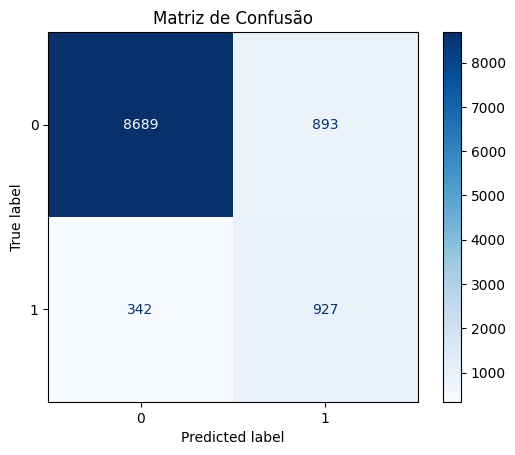

In [56]:
model_path = "Models/RandomForest_model.pkl"

# Carregar o modelo
with open(model_path, 'rb') as file:
   loaded_model = pickle.load(file)

calculate_metrics_byGridSearch(loaded_model, X_test_GS, y_test_GS, "RandomForest")

## Gradient Boosting Classifier

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model_path = "Models/GradientBoosting_model.pkl"

if not os.path.exists(model_path):
    print("A treinar modelo ...")

    # Grade de hiperparâmetros
    param_grid = {
        'n_estimators': [50, 100],
        'learning_rate': [0.001, 0.01],
        'max_depth': [7, 8, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
        'subsample': [0.6, 0.7],
        'loss': ['log_loss', 'exponential'],
        'criterion': ['friedman_mse', 'squared_error']
    }
    
    init_time = time.time()
    
    gbc_model = GradientBoostingClassifier(random_state=42)
    gb_grid_search = GridSearchCV(gbc_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    gb_grid_search.fit(X_train_GS, y_train_GS)
    
    print("Duração do treino: " + convert_seconds_to_MinAndSec(init_time))
    
    # Salvar o modelo
    with open(model_path, 'wb') as file:
        pickle.dump(gb_grid_search, file)
        
    print(f"Modelo salvo  em: {model_path}")
        
else:
    print("Modelo já existe !!")

A treinar modelo ...
Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Duração do treino: 617min, 27 seg
Modelo salvo  em: Models/GradientBoosting_model.pkl


Melhores hiperparâmetros: {'criterion': 'squared_error', 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}

Melhor F1-Score (valição cruzada): 0.27268115805511134
Scores de avaliação para subconjunto de teste:

Accuracy Score: 0.895
Precision Score: 0.762
Recall Score: 0.147
F1_score: 0.246


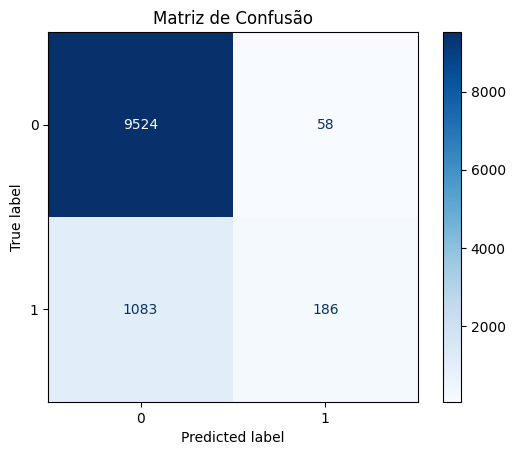

In [59]:
# Carregar o modelo 
with open(model_path, 'rb') as file:
   loaded_model = pickle.load(file)

calculate_metrics_byGridSearch(loaded_model, X_test_GS, y_test_GS, "GradientBoostingClassifier")

## XGBoost

In [60]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

model_path = "Models/XGBoost_model.pkl"

if not os.path.exists(model_path):
    print("A treinar modelo ...")

    # Grade de hiperparâmetros
    param_grid = {
        'learning_rate': [0.4, 0.5, 0.6], #0.01, 0.05
        'n_estimators': [80, 90], #60, 100
        'max_depth': [6, 7], #5
        'min_child_weight': [1], #2
        'gamma': [0.3, 0.4], #0.1, #0.2
        'subsample': [0.9, 0.95], #0.6, 0.8
        'colsample_bytree': [0.7, 0.8], #0.6, 0.9
        'reg_alpha': [0.15, 0.2], #0, 0.2, 0.05, 0.1
        'reg_lambda': [0.1] #0, 0.2, 0.05, 0.15
    }
    
    init_time = time.time()
    
    xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, n_jobs=-1)
    xgb_grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
    xgb_grid_search.fit(X_train_GS, y_train_GS)
    
    print("Duração do treino: " + convert_seconds_to_MinAndSec(init_time))

    # Salvar o modelo
    with open(model_path, 'wb') as file:
        pickle.dump(xgb_grid_search, file)
        
    print(f"Modelo salvo  em: {model_path}")
        
else:
    print("Modelo já existe !!")

A treinar modelo ...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Duração do treino: 2min, 3 seg
Modelo salvo  em: Models/XGBoost_model.pkl


Melhores hiperparâmetros: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.4, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 90, 'reg_alpha': 0.2, 'reg_lambda': 0.1, 'subsample': 0.95}

Melhor F1-Score (valição cruzada): 0.5386895546902738
Scores de avaliação para subconjunto de teste:

Accuracy Score: 0.902
Precision Score: 0.611
Recall Score: 0.452
F1_score: 0.519


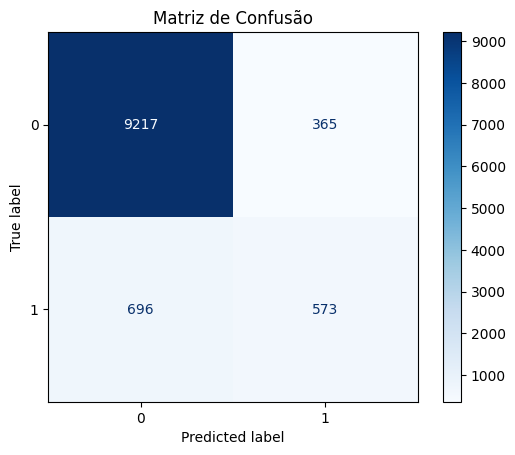

In [61]:
# Carregar o modelo 
with open(model_path, 'rb') as file:
   loaded_model = pickle.load(file)

calculate_metrics_byGridSearch(loaded_model, X_test_GS, y_test_GS, "XGBoost")

## Perceptron

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

model_path = "Models/Perceptron_model.pkl"

if not os.path.exists(model_path):
    print("A treinar modelo ...")

    param_grid = {
        'eta0': [0.001, 0.01, 0.1],  # Taxa de aprendizado
        'penalty': ['l2', 'l1', 'elasticnet', None],  # Regularização
        'alpha': [0.0001, 0.001, 0.01],    # Parâmetro de regularização
        'shuffle': [True, False] 
    }
    
    init_time = time.time()
    
    perceptron_model = Perceptron(random_state=42)
    perceptron_grid_search = GridSearchCV(perceptron_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
    perceptron_grid_search.fit(X_train_GS, y_train_GS)
    
    print("Duração do treino: " + convert_seconds_to_MinAndSec(init_time))

    # Salvar o modelo
    with open(model_path, 'wb') as file:
        pickle.dump(perceptron_grid_search, file)
        
    print(f"Modelo salvo  em: {model_path}")
        
else:
    print("Modelo já existe !!")

A treinar modelo ...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Duração do treino: 0min, 5 seg
Modelo salvo  em: Models/Perceptron_model.pkl


Melhores hiperparâmetros: {'alpha': 0.01, 'eta0': 0.001, 'penalty': 'elasticnet', 'shuffle': True}

Melhor F1-Score (valição cruzada): 0.48565301400438
Scores de avaliação para subconjunto de teste:

Accuracy Score: 0.885
Precision Score: 0.529
Recall Score: 0.136
F1_score: 0.217


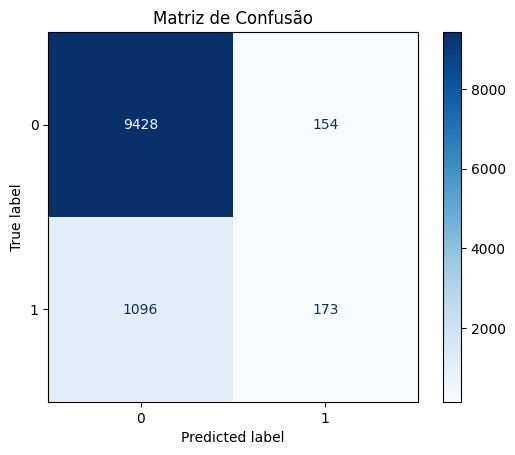

In [63]:
# Carregar o modelo 
with open(model_path, 'rb') as file:
   loaded_model = pickle.load(file)

calculate_metrics_byGridSearch(loaded_model, X_test_GS, y_test_GS, "Perceptron")

## Considerações Finais

RANDOM FOREST:
   
Melhor F1-Score (valição cruzada): 0.6086

    Scores de avaliação para subconjunto de teste:
    - Accuracy Score: 0.88
    - Precision Score: 0.5
    - Recall Score: 0.75
    - F1_score: 0.598

# Testes Finais

Nesta etapa final envolverá a validação do modelo LogisticRegression no dataset completo. O fluxo de trabalho incluirá o pré-processamento dos dados, o treinamento do modelo com o subconjunto de treino e sua testagem com o subconjunto de teste, empregando uma busca por hiperparâmetros para otimizar a performance do modelo.

## Trabalhar Dados Iniciais

In [64]:
X_worked_final = Pipeline(X)

## Dividir Dados em Treino e Teste

In [65]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_worked_final, y, test_size=0.3, 
                                                                            random_state=42, shuffle=True, stratify=y)

## Treinar e Testar Dados com RandomForestClassifier

Neste bloco de texto foram alterados os hiperparametros até que se atingisse os melhores resultados possíveis.

MÉTRICAS DE TREINO:
Accuracy Score: 0.937
Precision Score: 0.657
Recall Score: 0.97
F1_score: 0.784

MÉTRICAS DE TESTE:
Accuracy Score: 0.893
Precision Score: 0.531
Recall Score: 0.759
F1_score: 0.625


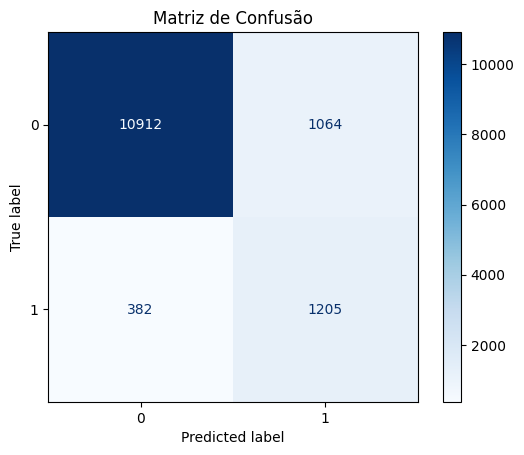

In [66]:
rf_model = RandomForestClassifier(random_state=42, class_weight = 'balanced', criterion = 'gini', max_depth = 16, 
                                  max_features = 10, min_samples_leaf = 5, min_samples_split = 10, n_estimators = 110)
rf_model.fit(X_train_final, y_train_final)

y_train_pred = rf_model.predict(X_train_final)
y_test_pred = rf_model.predict(X_test_final)

calculate_test_train_metrics(y_train_pred, y_test_pred, y_train_final, y_test_final)

# Análise dos Resultados

## Curva ROC

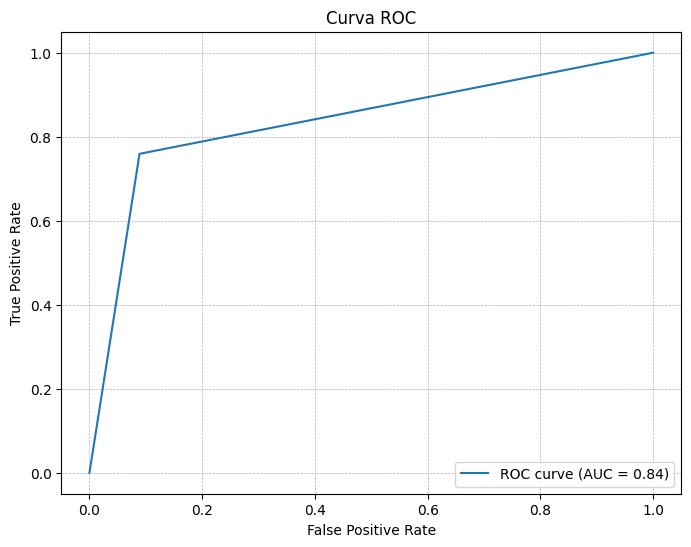

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcule FPR, TPR e thresholds
fpr, tpr, thresholds = roc_curve(y_test_final, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.show()

A AUC fornece um valor escalar único que resume o desempenho do modelo em todos os limiares. 
- Uma AUC de 1.0 representa um classificador perfeito. 
- Uma AUC de 0.5 representa um classificador aleatório. 
- Valores de AUC acima de 0,7 são considerados adequados, acima de 0,8 são bons e acima de 0,9 são excelentes. 

Este gráfico indica que o modelo tem boa capacidade de discriminação entre as classes.
A curva sobe rapidamente no início de TPR ≈ 0 para ≈ 0.76, isto significa que o modelo consegue detetar corretamente a maioria dos positivos sem muitos falsos positivos.

# Conclusão dos Resultados

- Desempenho Geral:

O modelo demonstrou uma accuracy elevada tanto nos dados de treino (93.7%) quanto nos dados de teste (89.3%), indicando que classifica corretamente a maioria das instâncias. No entanto, a diferença entre treino e teste sugere um ligeiro overfitting.

- Análise Detalhada das Métricas

    1. Precision (0.531 no teste): Apenas 53.1% das previsões positivas estão corretas, indicando um número considerável de falsos positivos.
    
    2. Recall (0.759 no teste): O modelo identifica corretamente 75.9% dos casos positivos reais, mostrando boa sensibilidade.
    
    3. F1-Score (0.625): O equilíbrio entre precision e recall é moderado, sugerindo espaço para melhorias.
 
- Interpretação da Matriz de Confusão

    1. Verdadeiros Negativos: 10.912 (clientes que não subscreveram corretamente identificados)
    2. Falsos Positivos: 1.025 (clientes previstos como subscrevedores que não subscreveram)
    3. Falsos Negativos: 1.205 (clientes que subscreveram mas não foram identificados)
    4. Verdadeiros Positivos: 382 (clientes que subscreveram corretamente identificados)


- Conclusão

    1. Boa capacidade geral de classificação (accuracy de 89.3%)
    2. Alta taxa de deteção de casos positivos (recall de 75.9%)
    3. Em 11976 casos negativos consegui-se prever corretamente 10912 casos.
    4. Em 1587 casos positivos consegui-se prever corretamente 1205 casos.

Como já explicado no capítulo "Avaliação e Comparação das Novas Representações do Dataset e dos Modelos Utilizados" mais especificamente no subcapítulo "Relatório dos Resultados Obtidos", não existe a possibilidade de haver contacto com o cliente para perceber qual é o objetivo da campanha, sendo que o objetivo poderia ser maximizar o lucro (minimizando o número de chamadas) ou então se o foco é capturar o máximo de clientes potenciais (mesmo que aumentasse o número de falsos positivos) optou-se por prioritizar a métrica F1-score. Caso fosse conhecido o objetivo campanha poder-se-ía ajustar o recall e precision scores.

# Exportar Requirements (Bibliotecas Necessárias)

In [68]:
!pip freeze > requirements.txt